In [1]:
#check the direction

In [2]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [3]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:/Work_with_Mis_Ataran")

# Verify the change
print(os.getcwd())

H:\Work_with_Mis_Ataran


In [6]:
import pandas as pd

# Read the Excel file
Data = pd.read_excel("data_validation\Jaghargh.xlsx")
# Show the first 5 rows
print(Data.head())

        Date   Hour  Hourly_Rain
0 2022-12-04  09:00          0.1
1 2023-02-20  10:00          0.1
2 2023-02-22  12:00          0.0
3 2023-02-27  12:00          0.0
4 2023-02-27  14:00          0.1


In [7]:
Data

,Date,Hour,Hourly_Rain
0,2022-12-04,09:00,0.1
1,2023-02-20,10:00,0.1
2,2023-02-22,12:00,0.0
3,2023-02-27,12:00,0.0
4,2023-02-27,14:00,0.1
...,...,...,...
3599,2025-04-02,12:00,0.0
3600,2025-04-02,18:00,0.0
3601,2025-04-02,23:00,0.0
3602,2025-04-03,06:00,0.0


In [4]:
file_path = r"Pr1990_2024_combined.nc"
era5_ds = xr.open_dataset(file_path)

NameError: name 'xr' is not defined

In [7]:
era5_ds

<xarray.Dataset> Size: 3GB
Dimensions:                     (time: 306816, lon: 50, lat: 42)
Coordinates:
  * time                        (time) datetime64[ns] 2MB 1990-01-01 ... 2024...
  * lon                         (lon) float64 400B 56.28 56.38 ... 61.08 61.18
  * lat                         (lat) float64 336B 33.51 33.61 ... 37.51 37.61
Data variables:
    total_precipitation_hourly  (time, lon, lat) float32 3GB ...
Attributes: (12/33)
    date_range:               [ 347155200000 1640649600000]
    description:              <p>ERA5-Land is a reanalysis dataset providing ...
    keywords:                 ['cds', 'climate', 'copernicus', 'ecmwf', 'era5...
    period:                   0
    product_tags:             ['temperature', 'lakes', 'snow', 'soil_water', ...
    provider:                 Climate Data Store
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

Loading data...
Clipping data to ROI...
Calculating mean precipitation...
Generating hourly time series plot...
Generating monthly and annual time series plots...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Generating mean and max maps...
All charts and maps have been saved successfully.


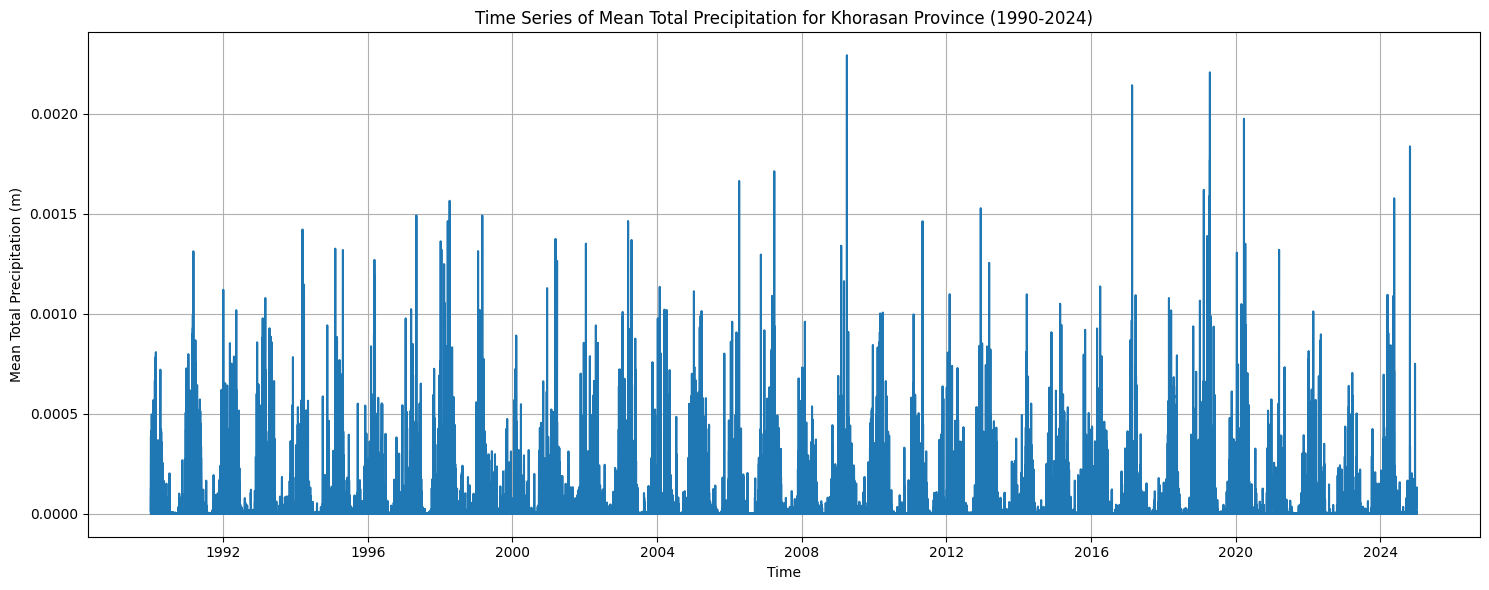

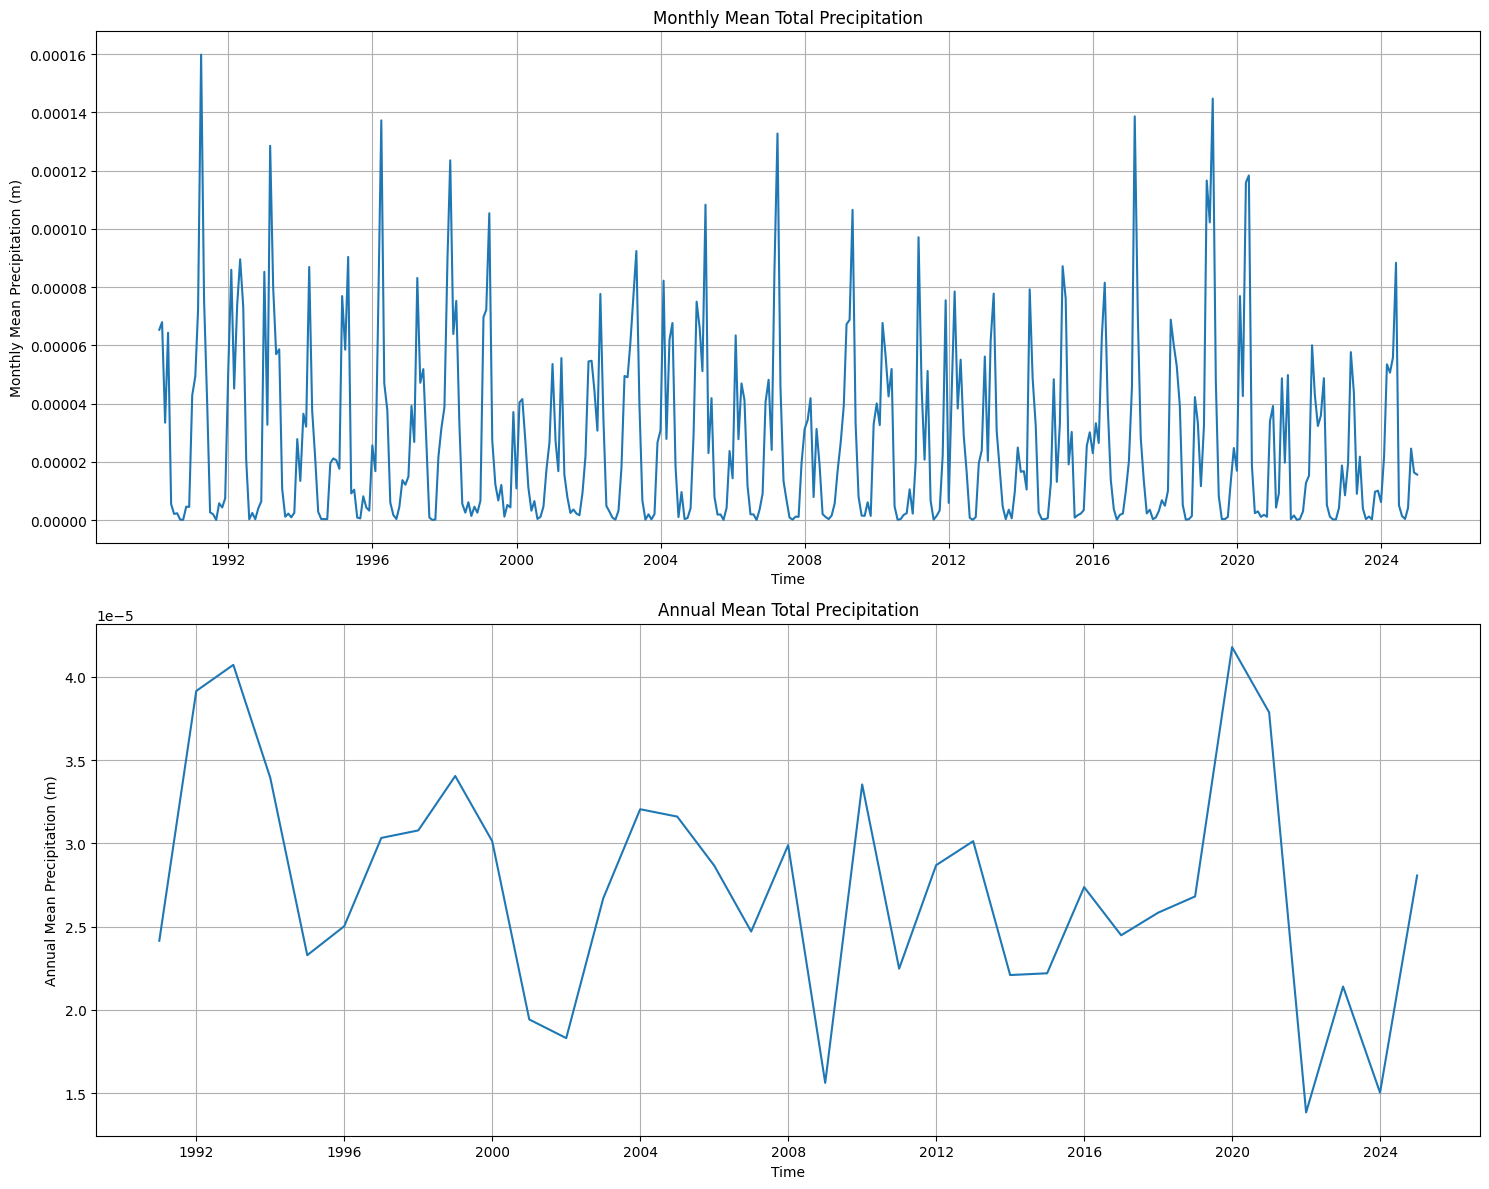

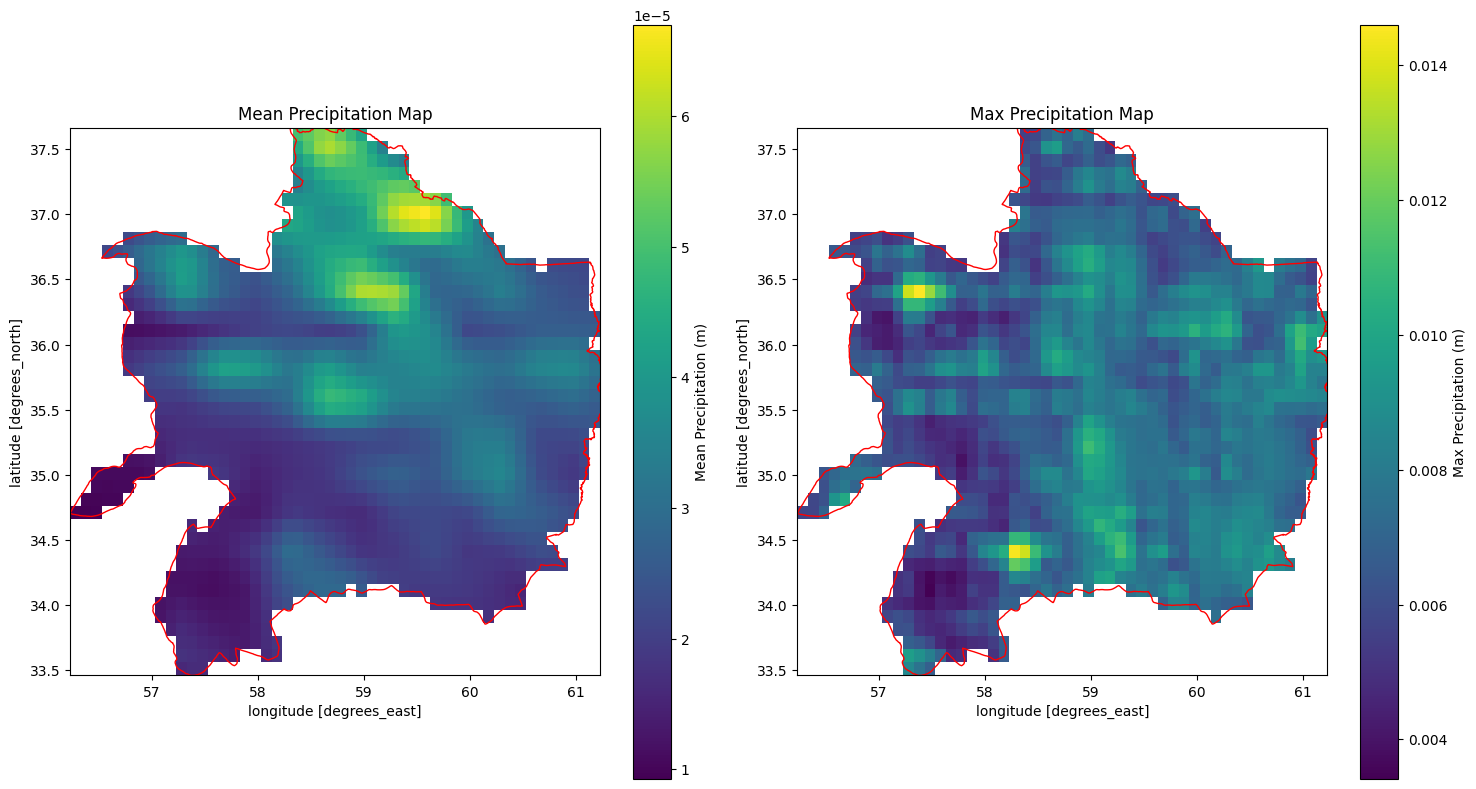

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray

# --- Configuration ---
# File paths for your data and shapefile
netcdf_path = "Pr1990_2024_combined.nc"
shapefile_path = "Province_Khorasan/province.shp"

# --- Main Script ---
try:
    print("Loading data...")
    # Load the NetCDF dataset
    era5_ds = xr.open_dataset(netcdf_path)

    # Load the shapefile using geopandas
    gdf = gpd.read_file(shapefile_path)
    
    # --- FIX for the dimension error ---
    # Explicitly set the spatial dimensions for rioxarray
    era5_ds = era5_ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

    # Set the CRS of the xarray dataset using rioxarray.
    # We assume the data is already in WGS84 (EPSG:4326), which is common.
    era5_ds.rio.write_crs("epsg:4326", inplace=True)

    # Clip the dataset to the boundaries of the shapefile
    # This process selects only the grid cells that fall within the shapefile's geometry
    print("Clipping data to ROI...")
    clipped_ds = era5_ds.rio.clip(gdf.geometry, gdf.crs, drop=True)

    # Calculate the mean of 'total_precipitation_hourly' over the clipped region's
    # latitude and longitude dimensions to create a single time series
    print("Calculating mean precipitation...")
    mean_precipitation_hourly = clipped_ds['total_precipitation_hourly'].mean(dim=['lon', 'lat'])

    # --- Plotting: Original Hourly Time Series ---
    print("Generating hourly time series plot...")
    plt.figure(figsize=(15, 6))
    mean_precipitation_hourly.plot()
    plt.title('Time Series of Mean Total Precipitation for Khorasan Province (1990-2024)')
    plt.xlabel('Time')
    plt.ylabel('Mean Total Precipitation (m)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_hourly_time_series.png')

    # --- Plotting: Resampled Monthly and Annual Time Series ---
    print("Generating monthly and annual time series plots...")
    
    # Resample the hourly data to a monthly and annual frequency
    mean_precipitation_monthly = mean_precipitation_hourly.resample(time="M").mean()
    mean_precipitation_annual = mean_precipitation_hourly.resample(time="Y").mean()
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot monthly data
    mean_precipitation_monthly.plot(ax=axes[0])
    axes[0].set_title('Monthly Mean Total Precipitation')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Monthly Mean Precipitation (m)')
    axes[0].grid(True)
    
    # Plot annual data
    mean_precipitation_annual.plot(ax=axes[1])
    axes[1].set_title('Annual Mean Total Precipitation')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Annual Mean Precipitation (m)')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_monthly_annual_time_series.png')

    # --- Plotting: Mean and Max Maps ---
    print("Generating mean and max maps...")
    
    # Calculate the mean and max over the time dimension
    mean_map = clipped_ds['total_precipitation_hourly'].mean(dim='time')
    max_map = clipped_ds['total_precipitation_hourly'].max(dim='time')
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    # Plot Mean Map
    # Use x='lon' and y='lat' to ensure correct orientation
    mean_map.plot(ax=axes[0], x='lon', y='lat', cmap='viridis', cbar_kwargs={'label': 'Mean Precipitation (m)'})
    axes[0].set_title('Mean Precipitation Map')
    gdf.plot(ax=axes[0], facecolor='none', edgecolor='red', linewidth=1)
    
    # Plot Max Map
    # Use x='lon' and y='lat' to ensure correct orientation
    max_map.plot(ax=axes[1], x='lon', y='lat', cmap='viridis', cbar_kwargs={'label': 'Max Precipitation (m)'})
    axes[1].set_title('Max Precipitation Map')
    gdf.plot(ax=axes[1], facecolor='none', edgecolor='red', linewidth=1)
    
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_maps.png')

    print("All charts and maps have been saved successfully.")

except FileNotFoundError as e:
    print(f"Error: A file was not found. Please check the paths. Details: {e}")
except KeyError as e:
    print(f"Error: A data variable or coordinate was not found in the dataset. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred. Details: {e}")


Loading data...
Clipping data to ROI...
Calculating mean precipitation...
Generating hourly time series plot...
Generating monthly and annual time series plots...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Generating mean and max maps...
Computing stationarity for hourly data...
Computing stationarity for daily data...
Computing stationarity for monthly data...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Computing stationarity for annual data...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Generating stationarity maps...
All charts, maps, and stationarity analysis have been completed successfully.


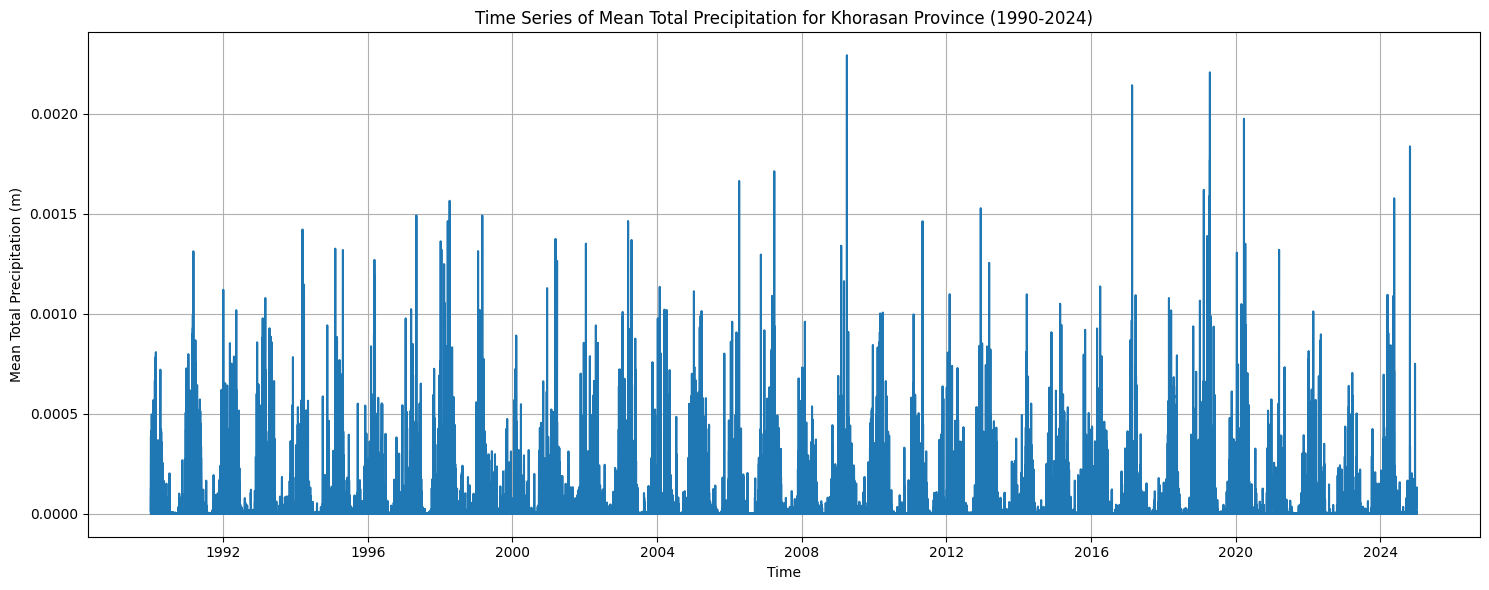

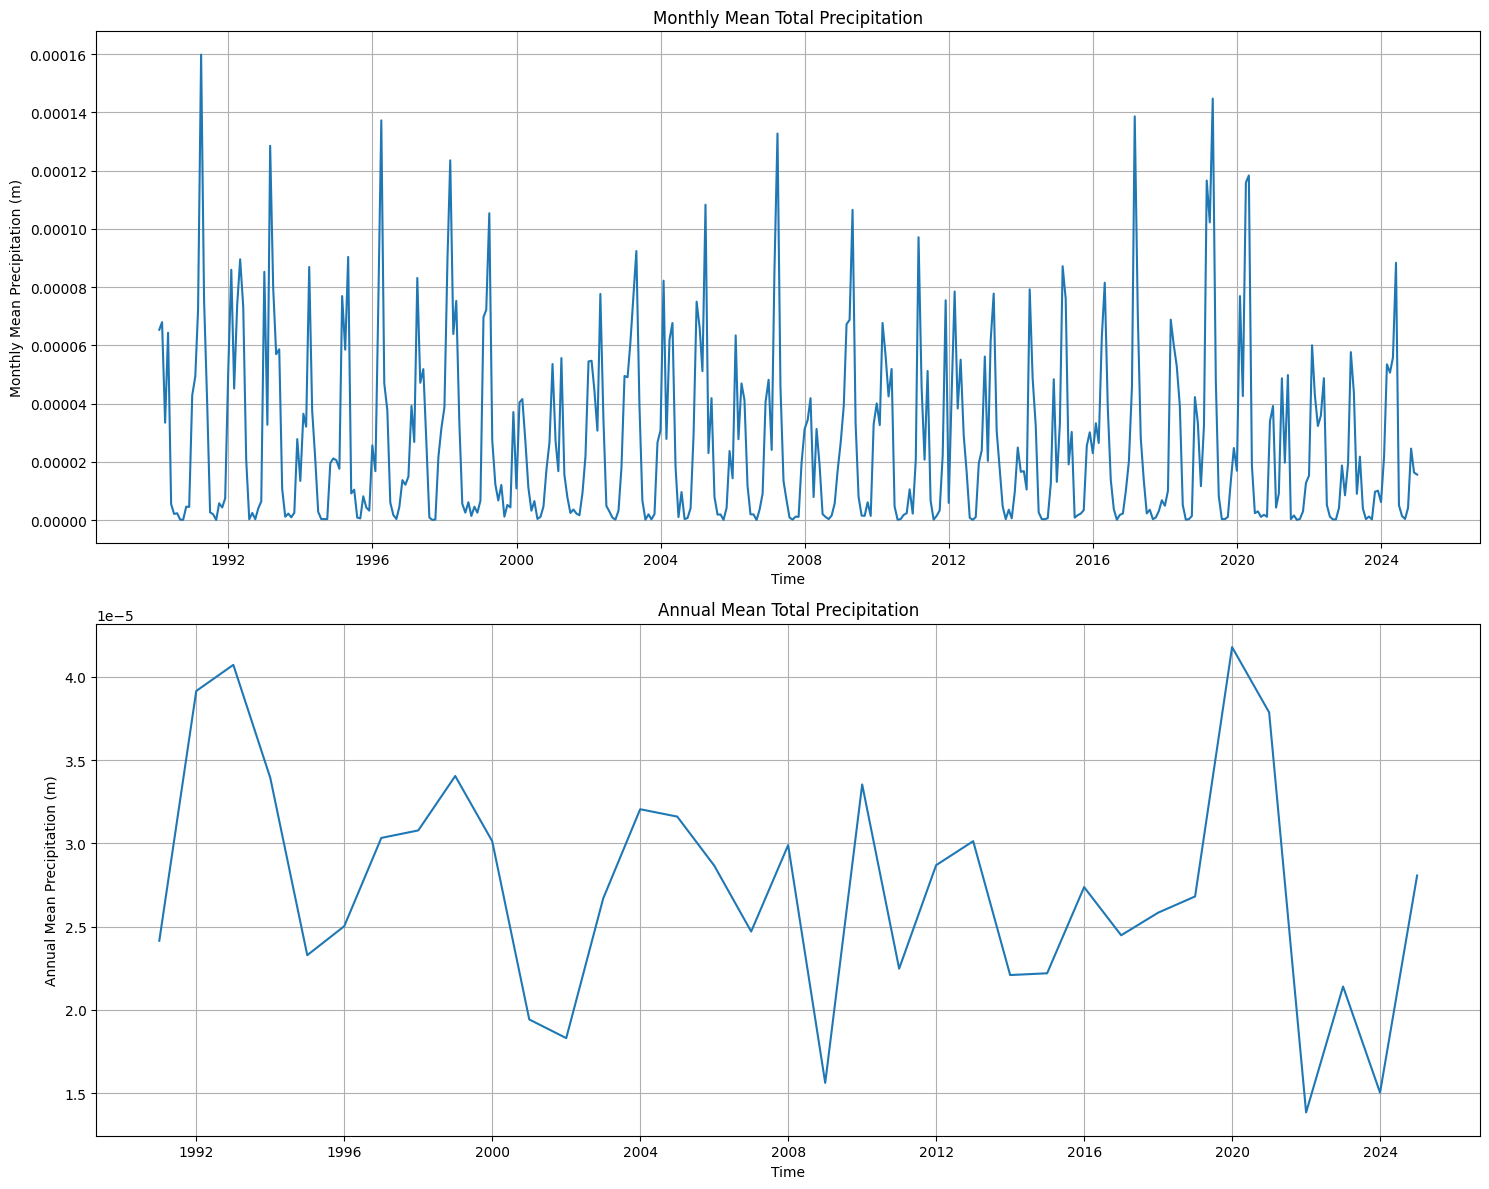

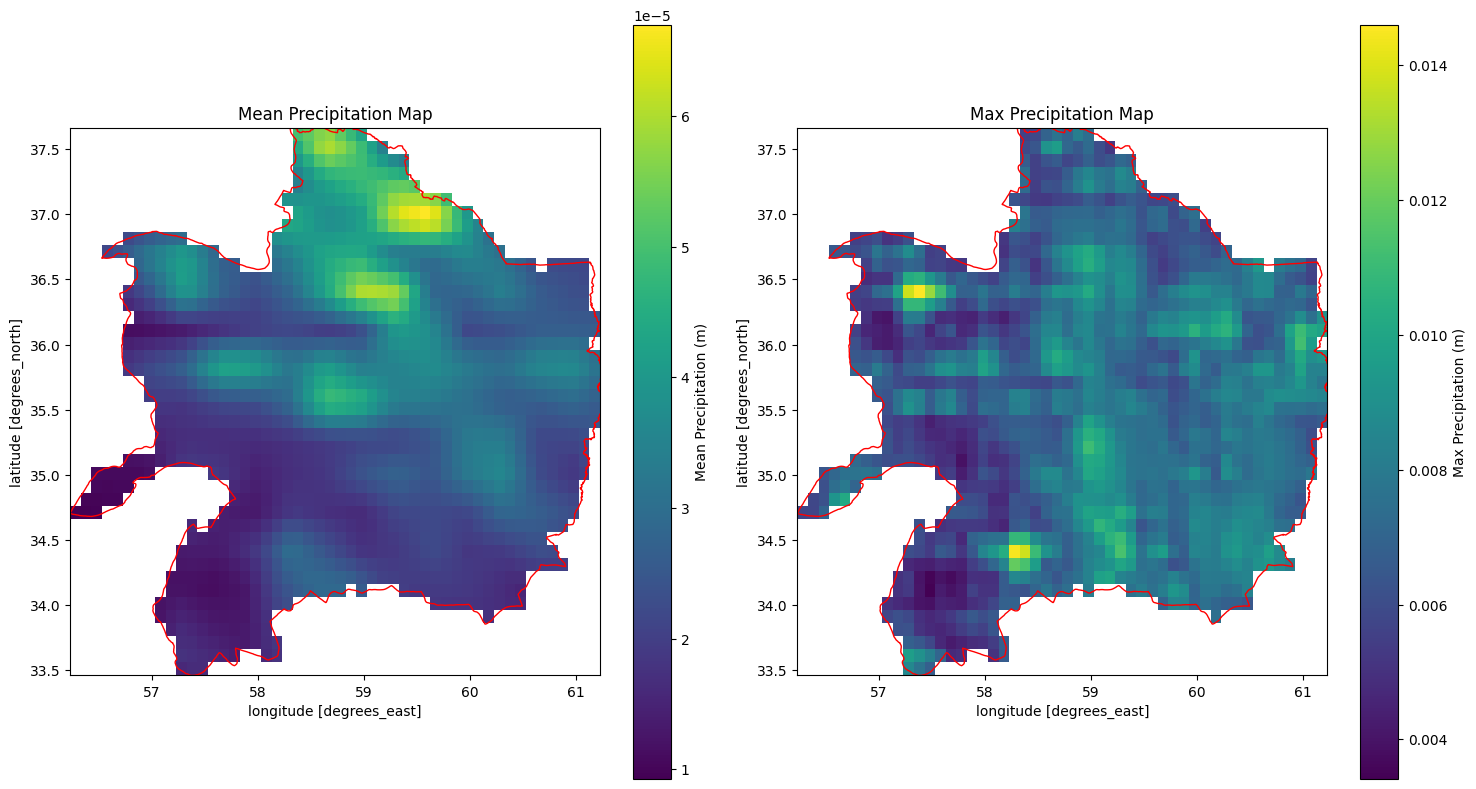

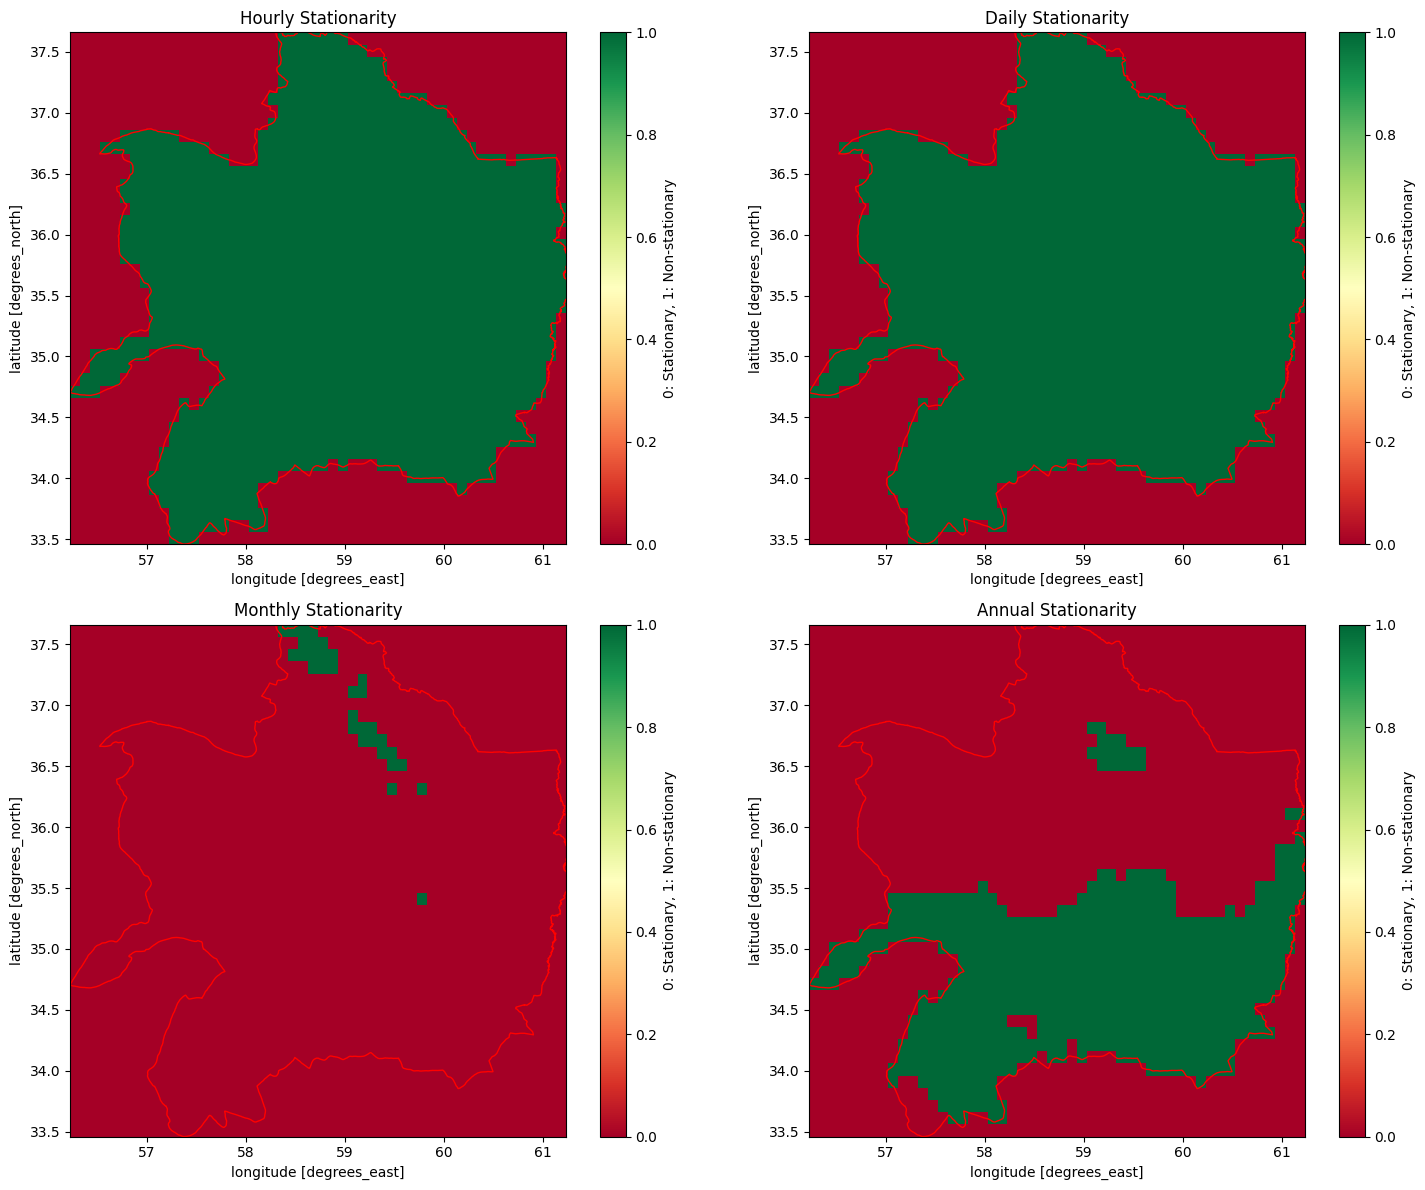

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray
import numpy as np
from scipy.stats import kendalltau

# --- Configuration ---
# File paths for your data and shapefile
netcdf_path = "Pr1990_2024_combined.nc"
shapefile_path = "Province_Khorasan/province.shp"

# --- Main Script ---
try:
    print("Loading data...")
    # Load the NetCDF dataset
    era5_ds = xr.open_dataset(netcdf_path)

    # Load the shapefile using geopandas
    gdf = gpd.read_file(shapefile_path)
    
    # --- FIX for the dimension error ---
    # Explicitly set the spatial dimensions for rioxarray
    era5_ds = era5_ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

    # Set the CRS of the xarray dataset using rioxarray.
    # We assume the data is already in WGS84 (EPSG:4326), which is common.
    era5_ds.rio.write_crs("epsg:4326", inplace=True)

    # Clip the dataset to the boundaries of the shapefile
    # This process selects only the grid cells that fall within the shapefile's geometry
    print("Clipping data to ROI...")
    clipped_ds = era5_ds.rio.clip(gdf.geometry, gdf.crs, drop=True)

    # Calculate the mean of 'total_precipitation_hourly' over the clipped region's
    # latitude and longitude dimensions to create a single time series
    print("Calculating mean precipitation...")
    mean_precipitation_hourly = clipped_ds['total_precipitation_hourly'].mean(dim=['lon', 'lat'])

    # --- Plotting: Original Hourly Time Series ---
    print("Generating hourly time series plot...")
    plt.figure(figsize=(15, 6))
    mean_precipitation_hourly.plot()
    plt.title('Time Series of Mean Total Precipitation for Khorasan Province (1990-2024)')
    plt.xlabel('Time')
    plt.ylabel('Mean Total Precipitation (m)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_hourly_time_series.png')

    # --- Plotting: Resampled Monthly and Annual Time Series ---
    print("Generating monthly and annual time series plots...")
    
    # Resample the hourly data to a monthly and annual frequency
    mean_precipitation_monthly = mean_precipitation_hourly.resample(time="M").mean()
    mean_precipitation_annual = mean_precipitation_hourly.resample(time="Y").mean()
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot monthly data
    mean_precipitation_monthly.plot(ax=axes[0])
    axes[0].set_title('Monthly Mean Total Precipitation')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Monthly Mean Precipitation (m)')
    axes[0].grid(True)
    
    # Plot annual data
    mean_precipitation_annual.plot(ax=axes[1])
    axes[1].set_title('Annual Mean Total Precipitation')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Annual Mean Precipitation (m)')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_monthly_annual_time_series.png')

    # --- Plotting: Mean and Max Maps ---
    print("Generating mean and max maps...")
    
    # Calculate the mean and max over the time dimension
    mean_map = clipped_ds['total_precipitation_hourly'].mean(dim='time')
    max_map = clipped_ds['total_precipitation_hourly'].max(dim='time')
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    # Plot Mean Map
    # Use x='lon' and y='lat' to ensure correct orientation
    mean_map.plot(ax=axes[0], x='lon', y='lat', cmap='viridis', cbar_kwargs={'label': 'Mean Precipitation (m)'})
    axes[0].set_title('Mean Precipitation Map')
    gdf.plot(ax=axes[0], facecolor='none', edgecolor='red', linewidth=1)
    
    # Plot Max Map
    # Use x='lon' and y='lat' to ensure correct orientation
    max_map.plot(ax=axes[1], x='lon', y='lat', cmap='viridis', cbar_kwargs={'label': 'Max Precipitation (m)'})
    axes[1].set_title('Max Precipitation Map')
    gdf.plot(ax=axes[1], facecolor='none', edgecolor='red', linewidth=1)
    
    plt.tight_layout()
    plt.savefig('khorasan_precipitation_maps.png')

    # --- New Section: Stationarity Analysis using Mann-Kendall Test ---

    def is_non_stationary(series, threshold=1.64):
        series = series[~np.isnan(series)]
        n = len(series)
        if n < 2:
            return 0
        tau, _ = kendalltau(np.arange(n), series)
        if np.isnan(tau):
            return 0
        se = np.sqrt((4 * n + 10) / (9 * n * (n - 1)))
        Z = tau / se
        return 1 if abs(Z) > threshold else 0

    # Hourly
    print("Computing stationarity for hourly data...")
    hourly_da = clipped_ds['total_precipitation_hourly']
    stationary_hourly = xr.apply_ufunc(
        is_non_stationary,
        hourly_da,
        input_core_dims=[['time']],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',  # If dask is available for parallelization
        output_dtypes=[int]
    )

    # Daily
    print("Computing stationarity for daily data...")
    daily_da = clipped_ds['total_precipitation_hourly'].resample(time='1D').sum()
    stationary_daily = xr.apply_ufunc(
        is_non_stationary,
        daily_da,
        input_core_dims=[['time']],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[int]
    )

    # Monthly
    print("Computing stationarity for monthly data...")
    monthly_da = clipped_ds['total_precipitation_hourly'].resample(time='1M').sum()
    stationary_monthly = xr.apply_ufunc(
        is_non_stationary,
        monthly_da,
        input_core_dims=[['time']],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[int]
    )

    # Annual
    print("Computing stationarity for annual data...")
    annual_da = clipped_ds['total_precipitation_hourly'].resample(time='1Y').sum()
    stationary_annual = xr.apply_ufunc(
        is_non_stationary,
        annual_da,
        input_core_dims=[['time']],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[int]
    )

    # Plotting the stationarity maps
    print("Generating stationarity maps...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Hourly
    stationary_hourly.plot(ax=axes[0, 0], x='lon', y='lat', cmap='RdYlGn', cbar_kwargs={'label': '0: Stationary, 1: Non-stationary'})
    axes[0, 0].set_title('Hourly Stationarity')
    gdf.plot(ax=axes[0, 0], facecolor='none', edgecolor='red', linewidth=1)

    # Daily
    stationary_daily.plot(ax=axes[0, 1], x='lon', y='lat', cmap='RdYlGn', cbar_kwargs={'label': '0: Stationary, 1: Non-stationary'})
    axes[0, 1].set_title('Daily Stationarity')
    gdf.plot(ax=axes[0, 1], facecolor='none', edgecolor='red', linewidth=1)

    # Monthly
    stationary_monthly.plot(ax=axes[1, 0], x='lon', y='lat', cmap='RdYlGn', cbar_kwargs={'label': '0: Stationary, 1: Non-stationary'})
    axes[1, 0].set_title('Monthly Stationarity')
    gdf.plot(ax=axes[1, 0], facecolor='none', edgecolor='red', linewidth=1)

    # Annual
    stationary_annual.plot(ax=axes[1, 1], x='lon', y='lat', cmap='RdYlGn', cbar_kwargs={'label': '0: Stationary, 1: Non-stationary'})
    axes[1, 1].set_title('Annual Stationarity')
    gdf.plot(ax=axes[1, 1], facecolor='none', edgecolor='red', linewidth=1)

    plt.tight_layout()
    plt.savefig('khorasan_stationarity_maps.png')

    print("All charts, maps, and stationarity analysis have been completed successfully.")

except FileNotFoundError as e:
    print(f"Error: A file was not found. Please check the paths. Details: {e}")
except KeyError as e:
    print(f"Error: A data variable or coordinate was not found in the dataset. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred. Details: {e}")

In [6]:
import xarray as xr
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from tqdm import tqdm

# Specify the path to your data file
netcdf_path = "Pr1990_2024_combined.nc"
output_path = "Pr2021_2024_downscaled.nc"

# Open the dataset without loading everything into memory by specifying chunks
ds = xr.open_dataset(netcdf_path, chunks={'time': 1})

# Select only the data for the time range 2021-01-01 to 2024-12-31
ds = ds.sel(time=slice('2021-01-01', '2024-12-31'))

# Extract the original coordinates and data
original_lons = ds['lon'].values
original_lats = ds['lat'].values

# Define the new, finer-resolution grid (0.01° x 0.01°)
# The new grid should cover the same extent as the original data
new_lons = np.arange(original_lons.min(), original_lons.max(), 0.05)
new_lats = np.arange(original_lats.min(), original_lats.max(), 0.05)

# Check if the data variable exists and has the correct dimensions
data_var_name = 'total_precipitation_hourly'
if data_var_name not in ds.data_vars or ds[data_var_name].ndim != 3:
    raise ValueError(f"The data variable '{data_var_name}' must be a 3D array (time, lon, lat).")

# Initialize an empty list to store the downscaled time slices
downscaled_slices = []

# Loop through each time step with a progress bar
for time_step in tqdm(ds.time, desc="Downscaling Progress"):
    # Get the data for the current time step
    data_slice_ds = ds.sel(time=time_step)
    data_slice = data_slice_ds[data_var_name].values
    
    # Create the interpolation function
    interpolator = RegularGridInterpolator((original_lons, original_lats), data_slice, method='linear', bounds_error=False, fill_value=0)
    
    # Create a meshgrid for the new coordinates
    new_lon_grid, new_lat_grid = np.meshgrid(new_lons, new_lats, indexing='ij')
    
    # Interpolate the data onto the new grid
    downscaled_slice = interpolator((new_lon_grid, new_lat_grid))
    
    # Store the result as a DataArray with correct coordinates and a time dimension
    downscaled_da = xr.DataArray(
        downscaled_slice,
        dims=['lon', 'lat'],
        coords={'lon': new_lons, 'lat': new_lats},
        name=data_var_name
    )
    
    # Add the time coordinate to the DataArray before appending
    downscaled_da = downscaled_da.expand_dims(time=[time_step.values])
    downscaled_slices.append(downscaled_da)

# Concatenate all downscaled slices into a single DataArray
downscaled_da_final = xr.concat(downscaled_slices, dim='time')

# Create a new xarray Dataset from the final DataArray
downscaled_ds = downscaled_da_final.to_dataset()

# Copy original attributes to the new dataset
downscaled_ds.attrs = ds.attrs

# Save the new dataset to a netCDF file
downscaled_ds.to_netcdf(output_path)

print(f"Downscaled data saved to {output_path}")

Downscaling Progress:   2%|▏         | 661/35064 [06:54<5:59:48,  1.59it/s] 


KeyboardInterrupt: 

In [5]:
import xarray as xr
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Define station information with paths
stations = [
    {"name": "Jaghargh", "lat": 36.3114864, "lon": 59.3224514, "path": "data_validation/Jaghargh.xlsx"},
    {"name": "Zoshk", "lat": 36.3385960, "lon": 59.1953066, "path": "data_validation/Zoshk.xlsx"},
    {"name": "Edareh", "lat": 36.3217200, "lon": 59.5684300, "path": "data_validation/Edareh.xlsx"},
    {"name": "Radkan", "lat": 36.8039817, "lon": 59.0101517, "path": "data_validation/Radkan.xlsx"},
    {"name": "Andarkh", "lat": 36.5820760, "lon": 59.6607562, "path": "data_validation/Andarkh.xlsx"},
    {"name": "Chenaran", "lat": 36.6462594, "lon": 59.1161501, "path": "data_validation/Chenaran.xlsx"},
    {"name": "Shandiz", "lat": 36.3995647, "lon": 59.3389961, "path": "data_validation/Shandiz.xlsx"},
    {"name": "Ferizi", "lat": 36.4884911, "lon": 58.9787934, "path": "data_validation/Ferizi.xlsx"},
    {"name": "Torogh", "lat": 36.1727771, "lon": 59.5526764, "path": "data_validation/Torogh.xlsx"}
]

# Load ERA5 NetCDF file
file_path = r"Pr1990_2024_combined.nc"
era5_ds = xr.open_dataset(file_path)
era5_precip = era5_ds['total_precipitation_hourly']

# Convert ERA5 precipitation from meters to millimeters
era5_precip_mm = era5_precip * 1000  # 1 m = 1000 mm

# Function to find nearest grid point
def find_nearest_grid(lat, lon, lat_array, lon_array):
    lat_idx = np.abs(lat_array - lat).argmin()
    lon_idx = np.abs(lon_array - lon).argmin()
    return lat_idx, lon_idx

# Create output directory for plots
output_dir = "scatter_plots"
os.makedirs(output_dir, exist_ok=True)

# Process each station
for station in stations:
    name = station['name']
    lat = station['lat']
    lon = station['lon']
    excel_path = station['path']
    
    # Load observation data
    try:
        obs_df = pd.read_excel(excel_path)
    except FileNotFoundError:
        print(f"Excel file for {name} not found at {excel_path}. Skipping...")
        continue
    
    # Combine Date and Hour into a single datetime column
    obs_df['DateTime'] = pd.to_datetime(obs_df['Date'].astype(str) + ' ' + obs_df['Hour'].astype(str))
    obs_df.set_index('DateTime', inplace=True)
    
    # Extract ERA5 data for the nearest grid point
    lat_idx, lon_idx = find_nearest_grid(lat, lon, era5_ds.lat.values, era5_ds.lon.values)
    era5_station = era5_precip_mm.isel(lat=lat_idx, lon=lon_idx).to_dataframe()['total_precipitation_hourly']
    
    # Align ERA5 data with observation dates
    common_dates = obs_df.index.intersection(era5_station.index)
    if len(common_dates) == 0:
        print(f"No overlapping dates for {name}. Skipping...")
        continue
    
    obs_data = obs_df.loc[common_dates, 'Hourly_Rain']
    era5_data = era5_station.loc[common_dates]
    
    # Remove NaN values for correlation and plotting
    valid_mask = ~obs_data.isna() & ~era5_data.isna()
    obs_valid = obs_data[valid_mask]
    era5_valid = era5_data[valid_mask]
    
    # Calculate Pearson correlation
    if len(obs_valid) >= 2:
        corr, p_value = pearsonr(obs_valid, era5_valid)
        corr_text = f'Correlation: {corr:.3f}\np-value: {p_value:.3e}'
        print(f"{name} Correlation: {corr:.3f}, p-value: {p_value:.3e}")
    else:
        corr_text = 'Insufficient data for correlation'
        print(f"Insufficient valid data for correlation at {name}.")
    
    # Plotting scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(obs_valid, era5_valid, alpha=0.5, color='blue')
    # Add 1:1 line
    max_val = max(obs_valid.max(), era5_valid.max())
    plt.plot([0, max_val], [0, max_val], 'r--', lw=2, label='1:1 Line')
    plt.xlabel('Observation Precipitation (mm)')
    plt.ylabel('ERA5 Precipitation (mm)')
    plt.title(f'ERA5 vs Observation Precipitation at {name} (ERA5 in mm)')
    plt.legend()
    plt.grid(True)
    
    # Add correlation text to the plot
    plt.text(0.02, 0.98, corr_text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Save plot
    plot_path = os.path.join(output_dir, f"{name}_scatter.png")
    plt.savefig(plot_path)
    plt.close()
    print(f"Scatter plot saved for {name} at {plot_path}")

# Close the NetCDF file
era5_ds.close()

Jaghargh Correlation: 0.358, p-value: 7.792e-94
Scatter plot saved for Jaghargh at scatter_plots\Jaghargh_scatter.png
Zoshk Correlation: 0.324, p-value: 6.865e-153
Scatter plot saved for Zoshk at scatter_plots\Zoshk_scatter.png
Edareh Correlation: 0.262, p-value: 2.106e-61
Scatter plot saved for Edareh at scatter_plots\Edareh_scatter.png
Radkan Correlation: 0.344, p-value: 0.000e+00
Scatter plot saved for Radkan at scatter_plots\Radkan_scatter.png
Andarkh Correlation: 0.337, p-value: 0.000e+00
Scatter plot saved for Andarkh at scatter_plots\Andarkh_scatter.png
Chenaran Correlation: 0.368, p-value: 1.213e-122
Scatter plot saved for Chenaran at scatter_plots\Chenaran_scatter.png
Shandiz Correlation: 0.166, p-value: 1.266e-132
Scatter plot saved for Shandiz at scatter_plots\Shandiz_scatter.png
Ferizi Correlation: 0.267, p-value: 0.000e+00
Scatter plot saved for Ferizi at scatter_plots\Ferizi_scatter.png
Torogh Correlation: -0.013, p-value: 7.817e-01
Scatter plot saved for Torogh at scatte

In [12]:
import xarray as xr
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define station information with paths
stations = [
    {"name": "Jaghargh", "lat": 36.3114864, "lon": 59.3224514, "path": "data_validation/Jaghargh.xlsx"},
    {"name": "Zoshk", "lat": 36.3385960, "lon": 59.1953066, "path": "data_validation/Zoshk.xlsx"},
    {"name": "Edareh", "lat": 36.3217200, "lon": 59.5684300, "path": "data_validation/Edareh.xlsx"},
    {"name": "Radkan", "lat": 36.8039817, "lon": 59.0101517, "path": "data_validation/Radkan.xlsx"},
    {"name": "Andarkh", "lat": 36.5820760, "lon": 59.6607562, "path": "data_validation/Andarkh.xlsx"},
    {"name": "Chenaran", "lat": 36.6462594, "lon": 59.1161501, "path": "data_validation/Chenaran.xlsx"},
    {"name": "Shandiz", "lat": 36.3995647, "lon": 59.3389961, "path": "data_validation/Shandiz.xlsx"},
    {"name": "Ferizi", "lat": 36.4884911, "lon": 58.9787934, "path": "data_validation/Ferizi.xlsx"},
    {"name": "Torogh", "lat": 36.1727771, "lon": 59.5526764, "path": "data_validation/Torogh.xlsx"}
]

# Load ERA5 NetCDF file
file_path = r"Pr1990_2024_combined.nc"
era5_ds = xr.open_dataset(file_path)
era5_precip = era5_ds['total_precipitation_hourly']

# Convert ERA5 precipitation from meters to millimeters
era5_precip_mm = era5_precip * 1000  # 1 m = 1000 mm

# Function to find nearest grid point
def find_nearest_grid(lat, lon, lat_array, lon_array):
    lat_idx = np.abs(lat_array - lat).argmin()
    lon_idx = np.abs(lon_array - lon).argmin()
    return lat_idx, lon_idx

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name, station_name):
    if len(y_true) >= 2:
        corr, p_value = pearsonr(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        print(f"{station_name} {dataset_name} - Correlation: {corr:.3f}, p-value: {p_value:.3e}, R^2: {r2:.3f}, RMSE: {rmse:.3f}")
        return f"Correlation: {corr:.3f}\np-value: {p_value:.3e}\nR^2: {r2:.3f}\nRMSE: {rmse:.3f}"
    else:
        print(f"Insufficient data for metrics calculation at {station_name} ({dataset_name}).")
        return "Insufficient data for metrics"

# Create output directory for plots
output_dir = "scatter_plots"
os.makedirs(output_dir, exist_ok=True)

# Process each station
for station in stations:
    name = station['name']
    lat = station['lat']
    lon = station['lon']
    excel_path = station['path']
    
    # Load observation data
    try:
        obs_df = pd.read_excel(excel_path)
    except FileNotFoundError:
        print(f"Excel file for {name} not found at {excel_path}. Skipping...")
        continue
    
    # Combine Date and Hour into a single datetime column
    obs_df['DateTime'] = pd.to_datetime(obs_df['Date'].astype(str) + ' ' + obs_df['Hour'].astype(str))
    obs_df.set_index('DateTime', inplace=True)
    
    # Extract ERA5 data for the nearest grid point
    lat_idx, lon_idx = find_nearest_grid(lat, lon, era5_ds.lat.values, era5_ds.lon.values)
    era5_station = era5_precip_mm.isel(lat=lat_idx, lon=lon_idx).to_dataframe()['total_precipitation_hourly']
    
    # Align ERA5 data with observation dates
    common_dates = obs_df.index.intersection(era5_station.index)
    if len(common_dates) == 0:
        print(f"No overlapping dates for {name}. Skipping...")
        continue
    
    obs_data = obs_df.loc[common_dates, 'Hourly_Rain']
    era5_data = era5_station.loc[common_dates]
    
    # Remove NaN values for correlation and plotting
    valid_mask = ~obs_data.isna() & ~era5_data.isna()
    obs_valid = obs_data[valid_mask]
    era5_valid = era5_data[valid_mask]
    
    # Train-test split (80% train, 20% test)
    if len(obs_valid) > 1:
        X = era5_valid.values.reshape(-1, 1)
        y = obs_valid.values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Calculate metrics for ERA5 (train and test)
        corr_text_train = calculate_metrics(y_train, X_train.flatten(), "ERA5 Train", name)
        corr_text_test = calculate_metrics(y_test, X_test.flatten(), "ERA5 Test", name)
        
        # Plotting scatter plot for ERA5 vs Obs (Test set)
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, X_test, alpha=0.5, color='blue')
        max_val = max(y_test.max(), X_test.max()) if len(y_test) > 0 else 1
        plt.plot([0, max_val], [0, max_val], 'r--', lw=2, label='1:1 Line')
        plt.xlabel('Observation Precipitation (mm)')
        plt.ylabel('ERA5 Precipitation (mm)')
        plt.title(f'ERA5 vs Observation Precipitation at {name} (Test Set)')
        plt.legend()
        plt.grid(True)
        plt.text(0.02, 0.98, corr_text_test, transform=plt.gca().transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        plt.tight_layout()
        plot_path = os.path.join(output_dir, f"{name}_scatter.png")
        plt.savefig(plot_path)
        plt.close()
        print(f"Scatter plot saved for {name} at {plot_path}")
        
        # Bias correction using Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Apply to all era5_data
        X_all = era5_data.values.reshape(-1, 1)
        corrected_vals = rf.predict(X_all)
        corrected_vals = np.clip(corrected_vals, 0, None)  # Ensure non-negative
        corrected = pd.Series(corrected_vals, index=era5_data.index)
        
        # Get corrected valid for scatter and corr
        corrected_valid = corrected[valid_mask]
        corrected_train = rf.predict(X_train)
        corrected_test = rf.predict(X_test)
        
        # Calculate metrics for corrected (train and test)
        corr_text_train_c = calculate_metrics(y_train, corrected_train, "Corrected Train", name)
        corr_text_test_c = calculate_metrics(y_test, corrected_test, "Corrected Test", name)
        
        # Plot scatter for Corrected vs Obs (Test set)
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, corrected_test, alpha=0.5, color='green')
        max_val_c = max(y_test.max(), corrected_test.max()) if len(y_test) > 0 else 1
        plt.plot([0, max_val_c], [0, max_val_c], 'r--', lw=2, label='1:1 Line')
        plt.xlabel('Observation Precipitation (mm)')
        plt.ylabel('Bias Corrected Precipitation (mm)')
        plt.title(f'Bias Corrected ERA5 vs Observation Precipitation at {name} (Test Set)')
        plt.legend()
        plt.grid(True)
        plt.text(0.02, 0.98, corr_text_test_c, transform=plt.gca().transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        plt.tight_layout()
        plot_path_c = os.path.join(output_dir, f"{name}_corrected_scatter.png")
        plt.savefig(plot_path_c)
        plt.close()
        print(f"Corrected scatter plot saved for {name} at {plot_path_c}")
        
        # Time series plot
        plt.figure(figsize=(12, 6))
        plt.plot(common_dates, obs_data, label='Observation', color='blue', alpha=0.7)
        plt.plot(common_dates, era5_data, label='ERA5', color='red', alpha=0.7)
        plt.plot(common_dates, corrected, label='Bias Corrected', color='green', alpha=0.7)
        plt.xlabel('Date')
        plt.ylabel('Precipitation (mm)')
        plt.title(f'Precipitation Time Series at {name}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        ts_path = os.path.join(output_dir, f"{name}_timeseries.png")
        plt.savefig(ts_path)
        plt.close()
        print(f"Time series plot saved for {name} at {ts_path}")
    else:
        print(f"Insufficient data for bias correction at {name}.")

# Close the NetCDF file
era5_ds.close()

Jaghargh ERA5 Train - Correlation: 0.366, p-value: 9.329e-79, R^2: 0.030, RMSE: 0.459
Jaghargh ERA5 Test - Correlation: 0.328, p-value: 6.295e-17, R^2: -0.002, RMSE: 0.473
Scatter plot saved for Jaghargh at scatter_plots\Jaghargh_scatter.png
Jaghargh Corrected Train - Correlation: 0.949, p-value: 0.000e+00, R^2: 0.848, RMSE: 0.182
Jaghargh Corrected Test - Correlation: 0.271, p-value: 8.402e-12, R^2: -0.032, RMSE: 0.480
Corrected scatter plot saved for Jaghargh at scatter_plots\Jaghargh_corrected_scatter.png
Time series plot saved for Jaghargh at scatter_plots\Jaghargh_timeseries.png
Zoshk ERA5 Train - Correlation: 0.314, p-value: 3.139e-115, R^2: 0.080, RMSE: 0.683
Zoshk ERA5 Test - Correlation: 0.383, p-value: 4.244e-45, R^2: 0.111, RMSE: 0.520
Scatter plot saved for Zoshk at scatter_plots\Zoshk_scatter.png
Zoshk Corrected Train - Correlation: 0.889, p-value: 0.000e+00, R^2: 0.761, RMSE: 0.348
Zoshk Corrected Test - Correlation: 0.265, p-value: 1.676e-21, R^2: -0.265, RMSE: 0.620
Cor

Station: Jaghargh
R²: -0.3195
RMSE: 1.3442
PBIAS: 20.6707%




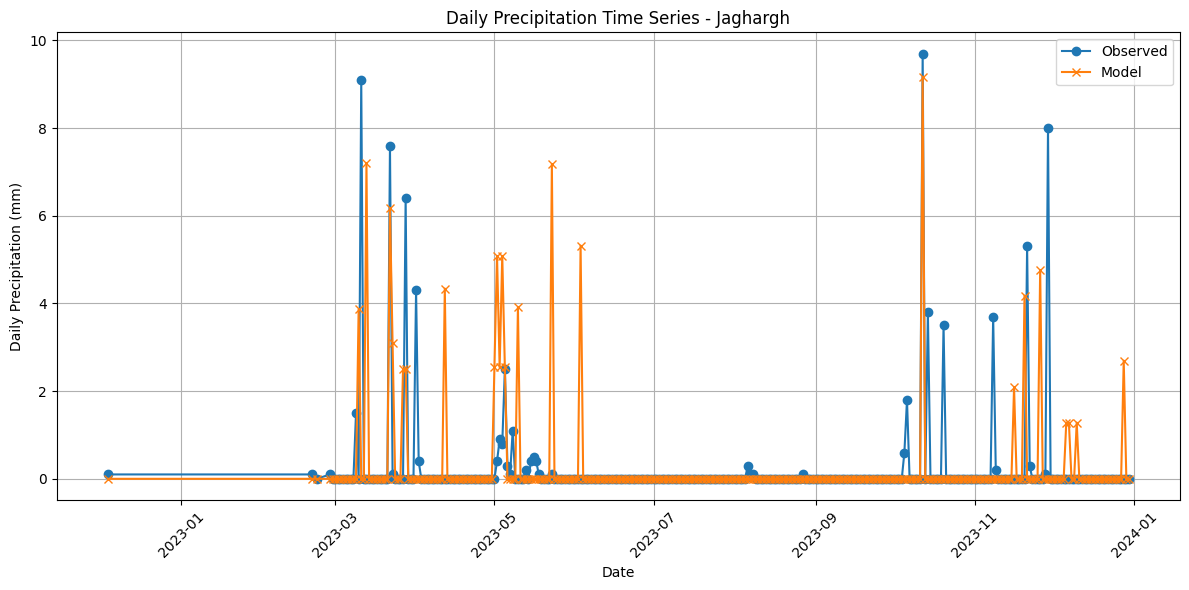

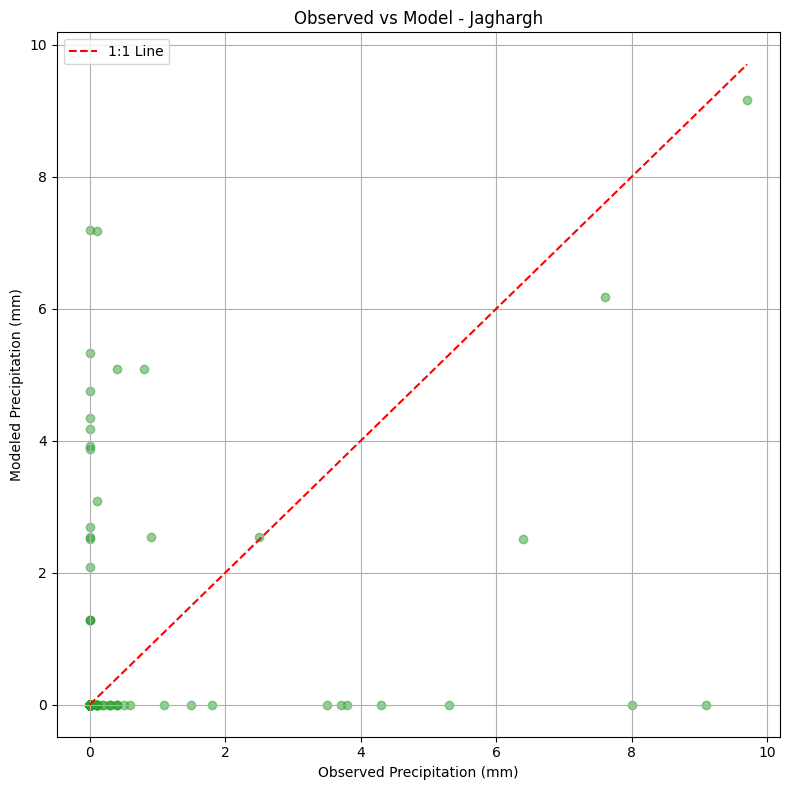

Station: Zoshk
R²: 0.1858
RMSE: 2.9634
PBIAS: -41.2170%




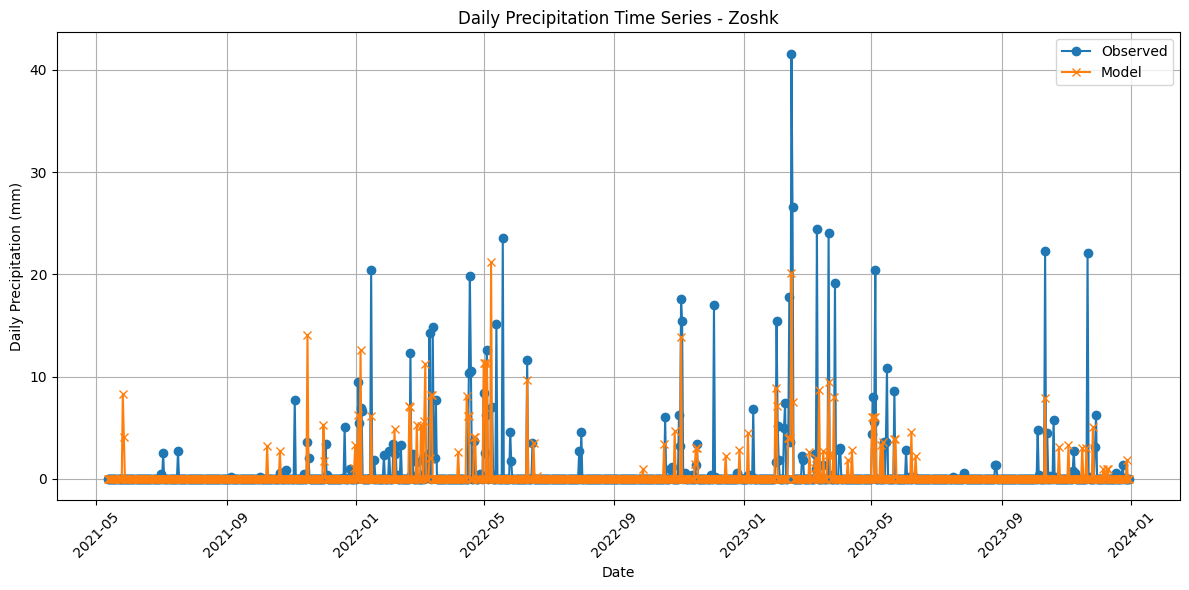

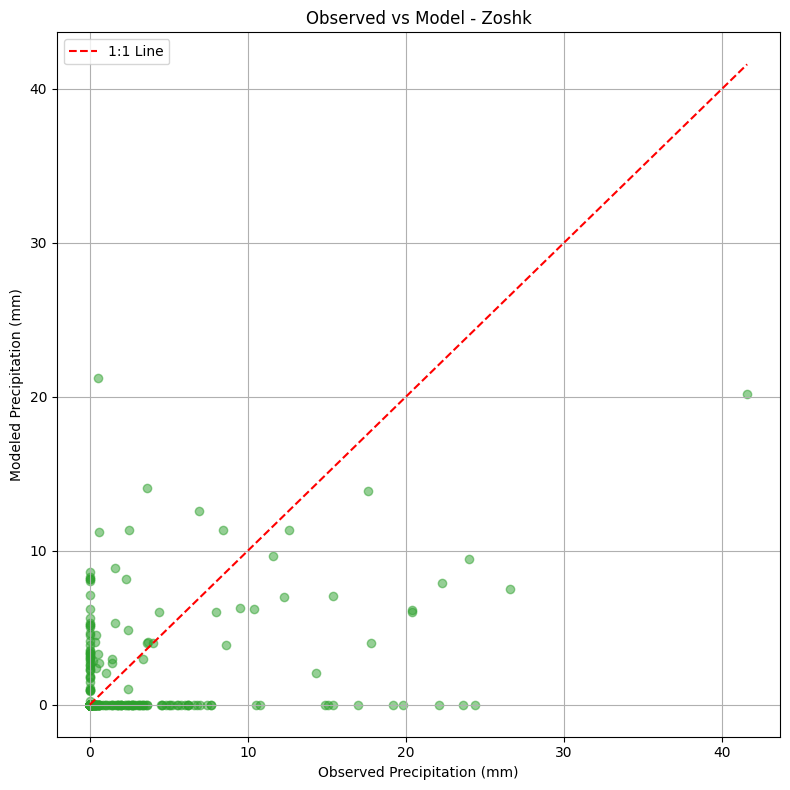

Station: Edareh
R²: -0.7881
RMSE: 1.5590
PBIAS: 66.4075%




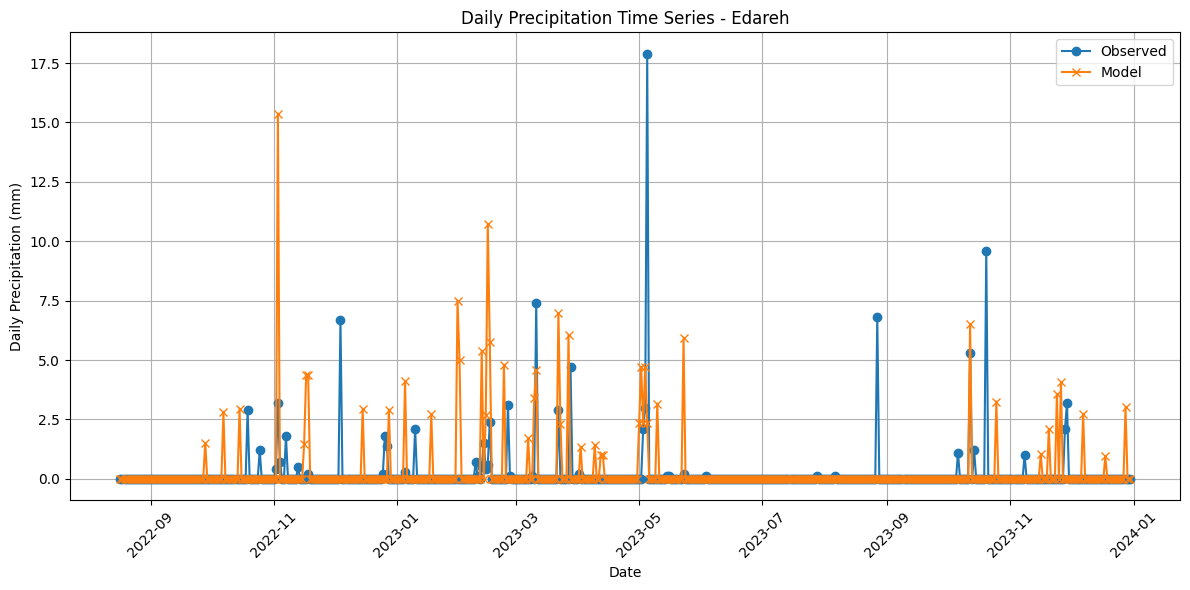

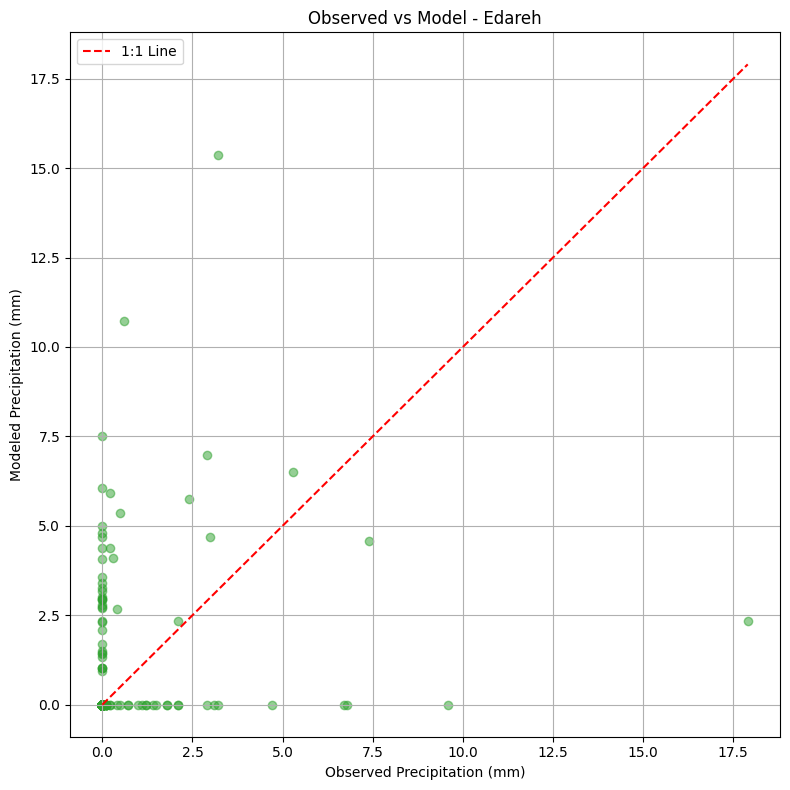

Station: Radkan
R²: -0.1493
RMSE: 2.0581
PBIAS: 52.3255%




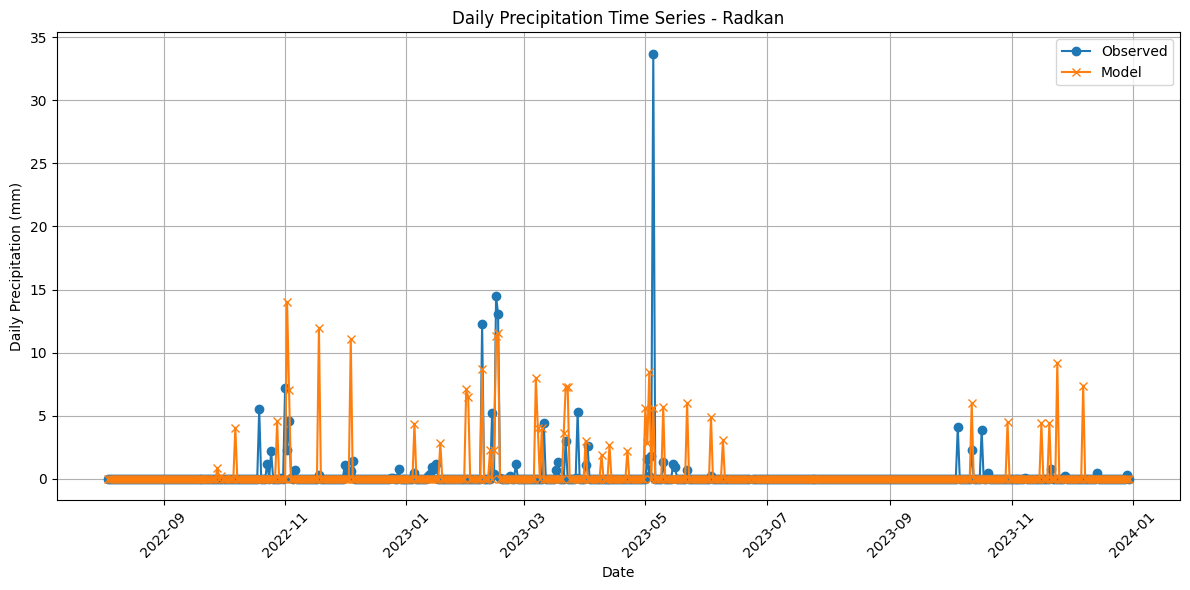

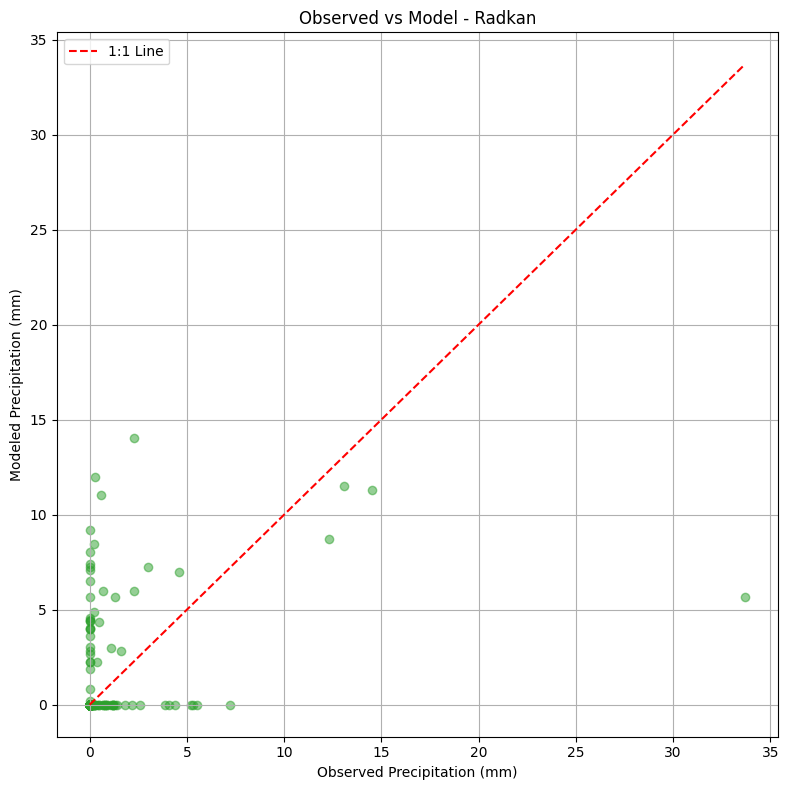

Station: Andarkh
R²: -0.9041
RMSE: 1.5666
PBIAS: 55.2268%




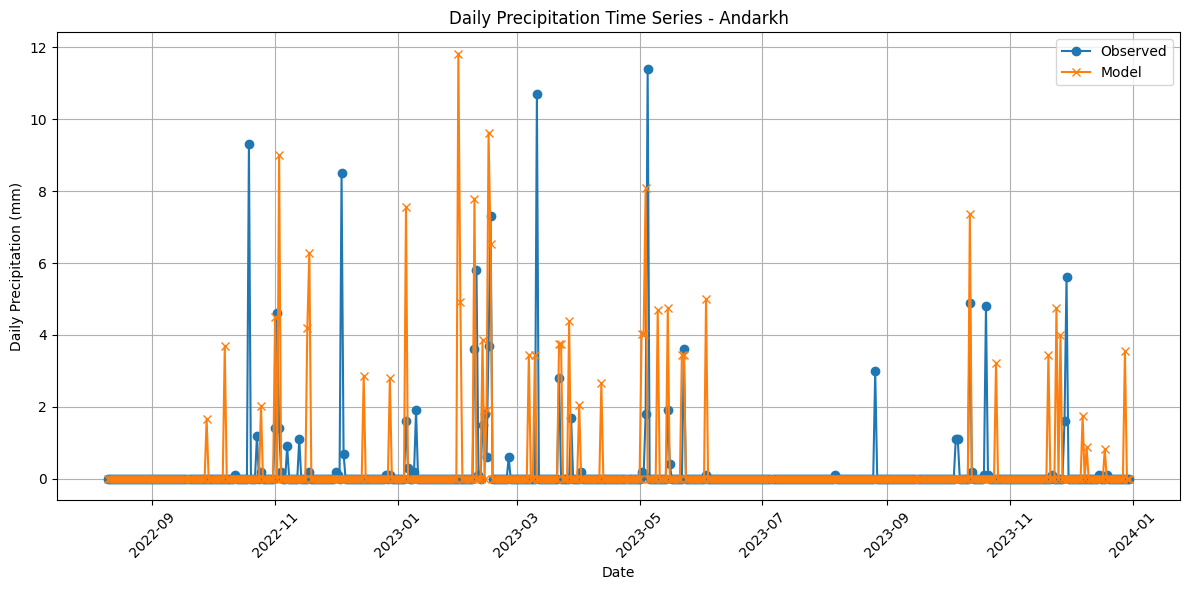

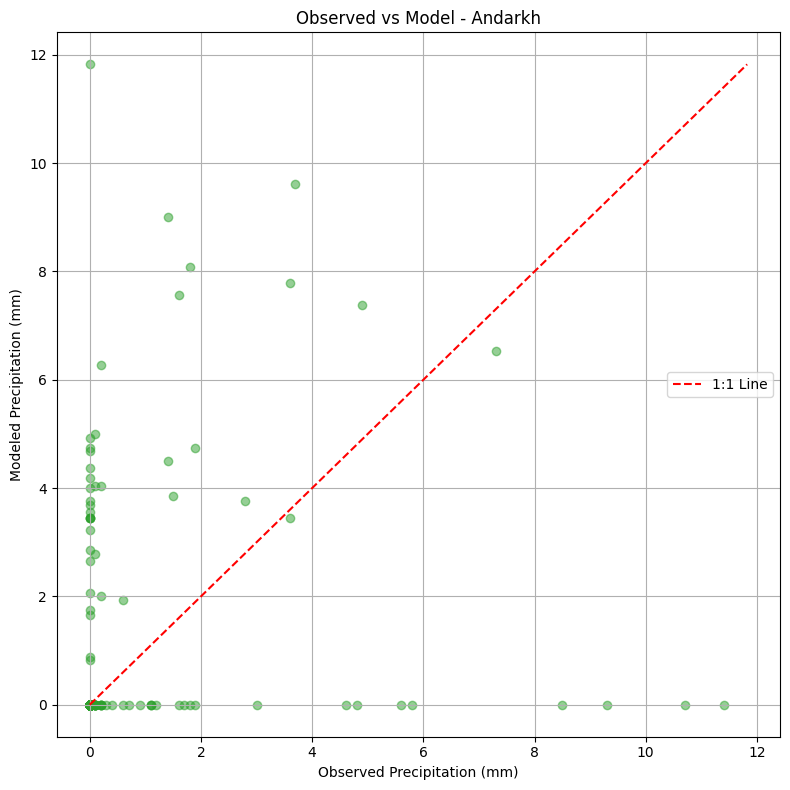

Station: Chenaran
R²: 0.0524
RMSE: 2.2098
PBIAS: 22.7423%




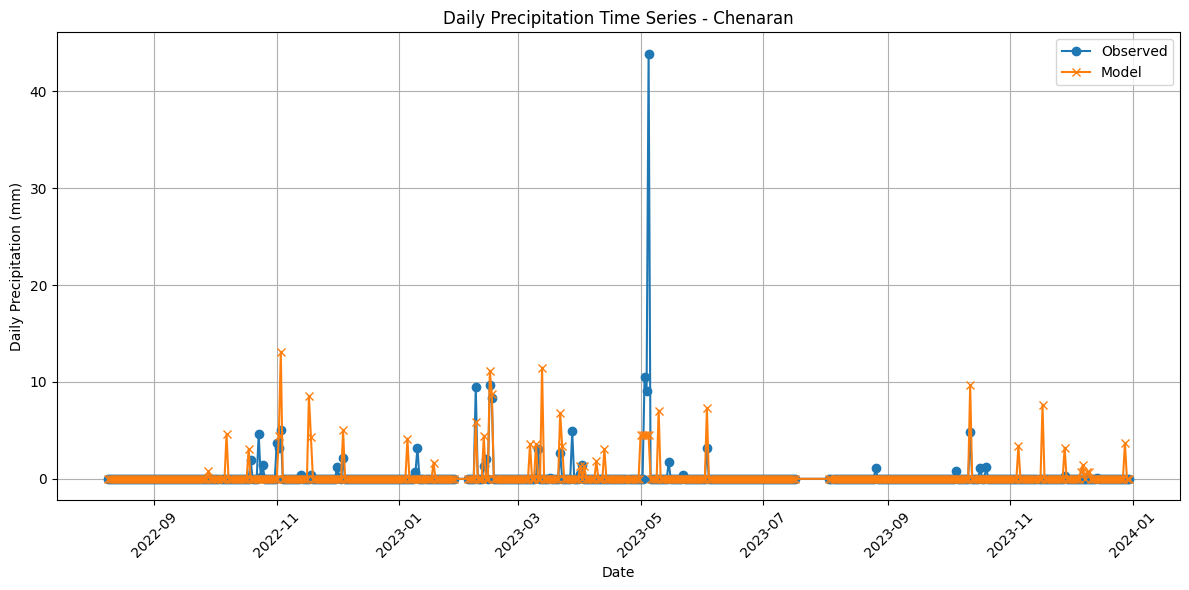

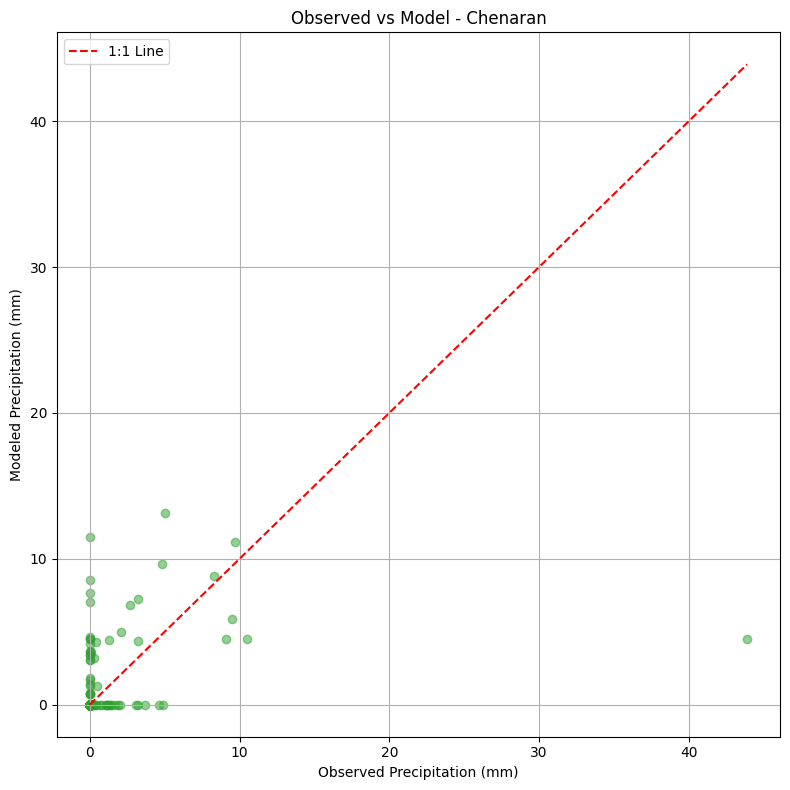

Station: Shandiz
R²: -2.5420
RMSE: 1.4346
PBIAS: 84.2484%




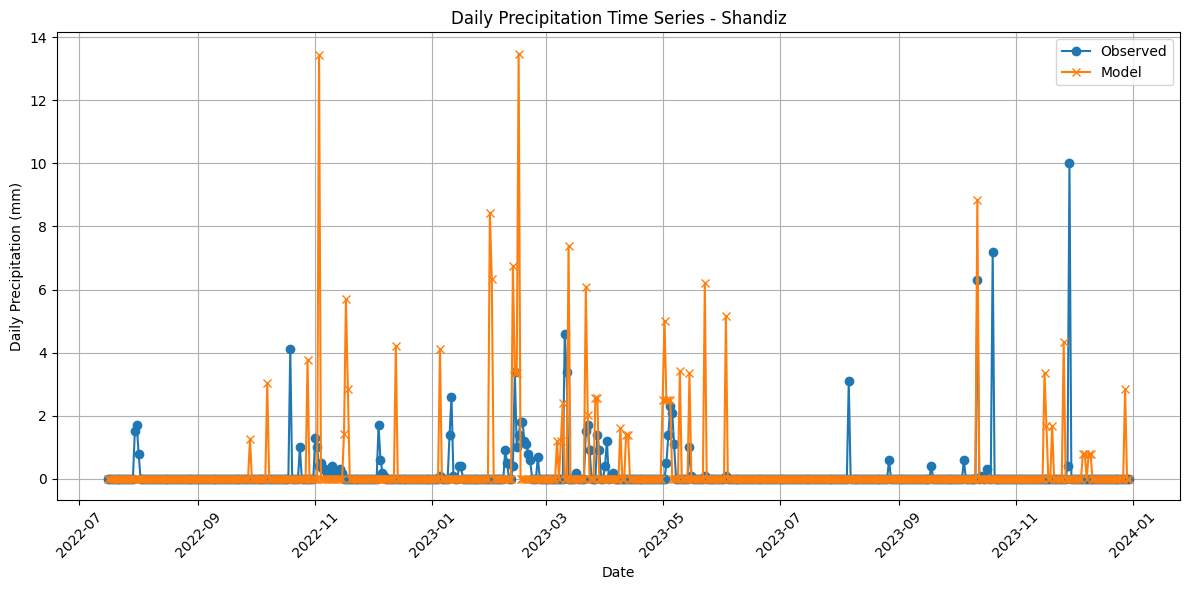

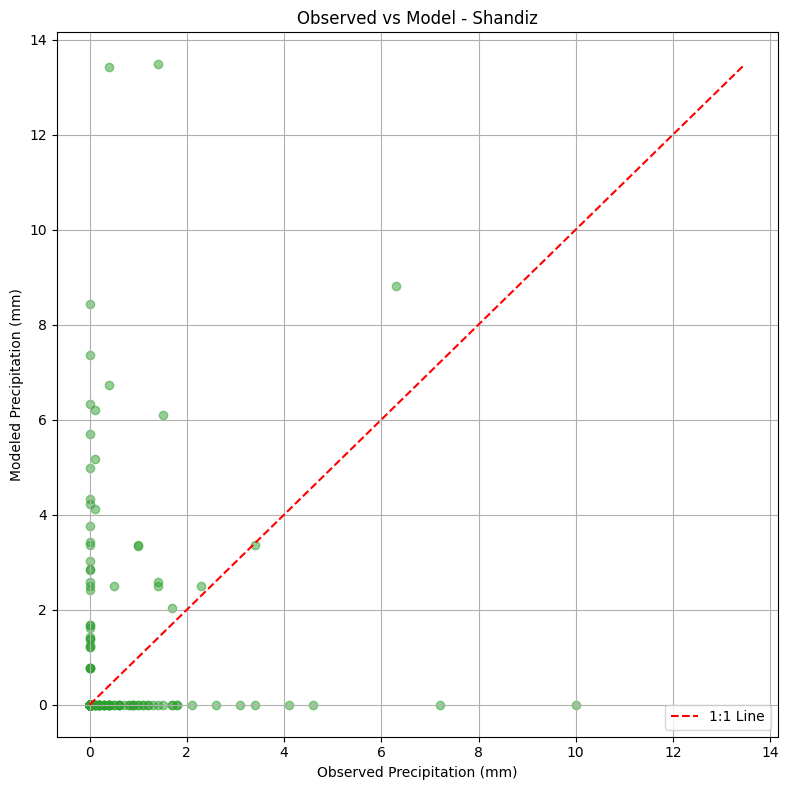

Station: Ferizi
R²: -0.2630
RMSE: 1.8356
PBIAS: 89.2693%




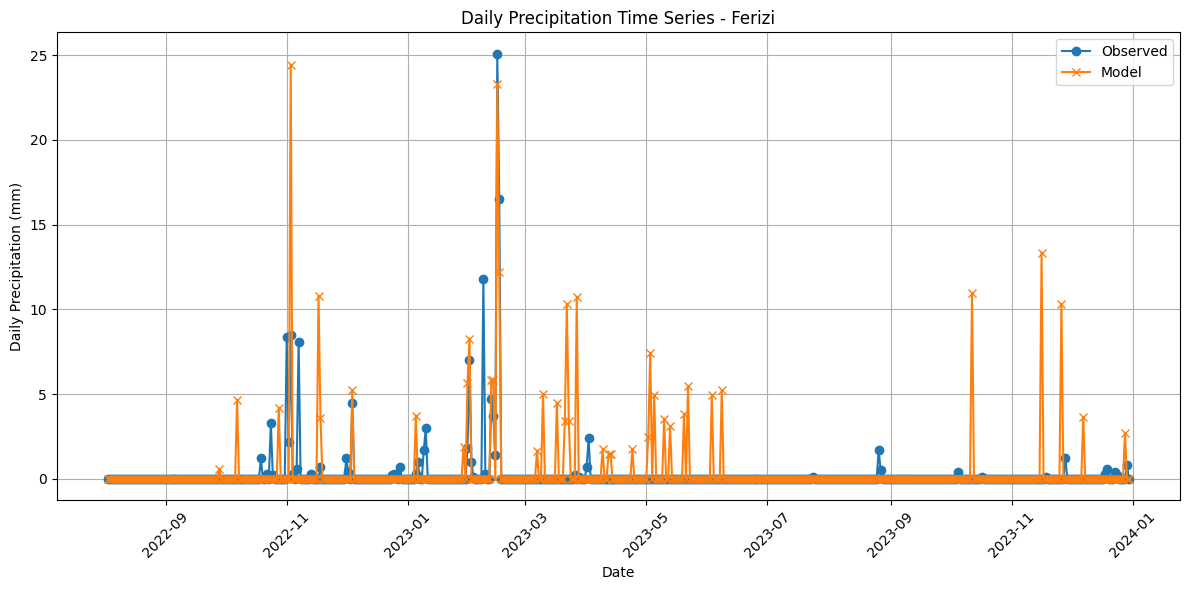

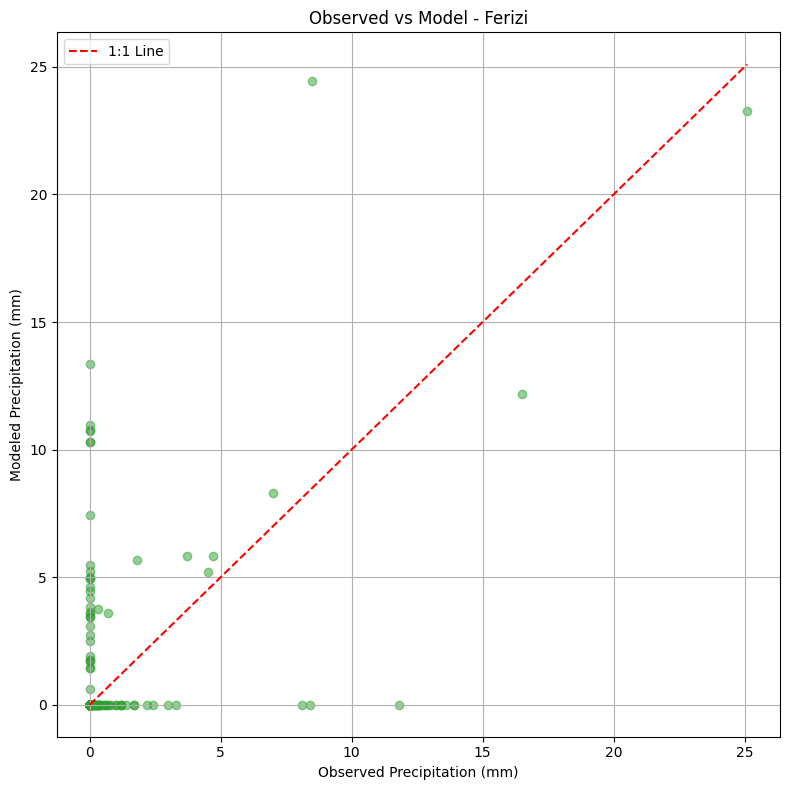

Station: Torogh
R²: -1.0000
RMSE: 2381961.1759
PBIAS: -100.0000%




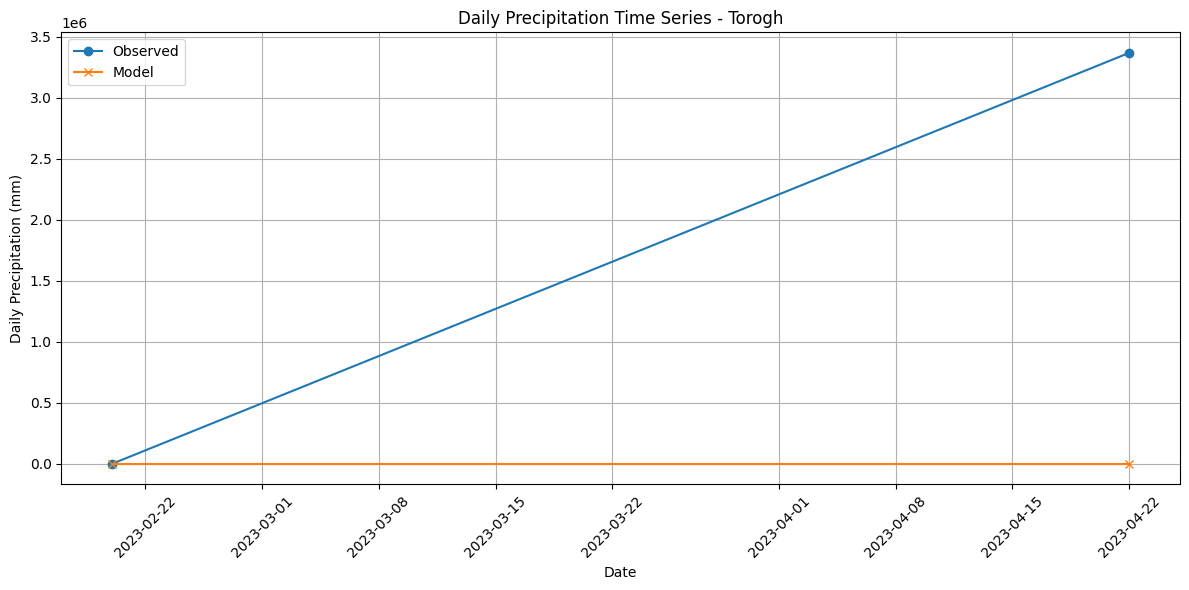

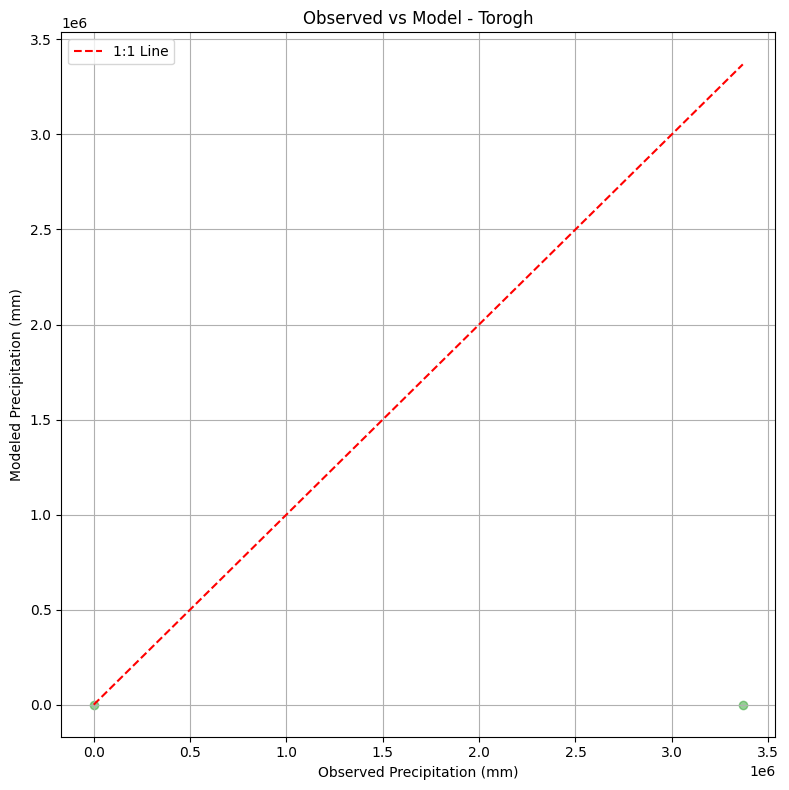


Summary of Metrics for All Stations:
 Station      R²         RMSE  PBIAS (%)
Jaghargh -0.3195       1.3442    20.6707
   Zoshk  0.1858       2.9634   -41.2170
  Edareh -0.7881       1.5590    66.4075
  Radkan -0.1493       2.0581    52.3255
 Andarkh -0.9041       1.5666    55.2268
Chenaran  0.0524       2.2098    22.7423
 Shandiz -2.5420       1.4346    84.2484
  Ferizi -0.2630       1.8356    89.2693
  Torogh -1.0000 2381961.1759  -100.0000

Metrics saved to 'metrics_summary.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

# List of stations
stations = ['Jaghargh', 'Zoshk', 'Edareh', 'Radkan', 'Andarkh', 'Chenaran', 'Shandiz', 'Ferizi', 'Torogh']

# Function to calculate PBIAS
def calculate_pbias(observed, modeled):
    if np.sum(observed) == 0:
        return np.nan
    return 100 * np.sum(modeled - observed) / np.sum(observed)

# Dictionary to store metrics for all stations
metrics_summary = []

for station in stations:
    try:
        # Load observed hourly data from XLSX
        obs_path = f"data_validation/{station}.xlsx"
        obs_df = pd.read_excel(obs_path)
        
        # Ensure 'Date' and 'Hourly_Rain' columns exist
        if not {'Date', 'Hourly_Rain'}.issubset(obs_df.columns):
            print(f"Missing required columns in observed data for station: {station}")
            continue
        
        # Convert 'Date' to datetime
        obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
        if obs_df['Date'].isna().any():
            print(f"Invalid date format in observed data for station: {station}")
            continue
        
        # Calculate daily sum of precipitation
        daily_obs = obs_df.groupby('Date')['Hourly_Rain'].sum().reset_index()
        daily_obs.rename(columns={'Hourly_Rain': 'Obs'}, inplace=True)
        
        # Load model daily data from CSV
        model_path = f"data_validation/Data_time_seri_daily/{station}_time_seri_daily.csv"
        model_df = pd.read_csv(model_path)
        
        # Ensure 'Time' and 'Value' columns exist
        if not {'Time', 'Value'}.issubset(model_df.columns):
            print(f"Missing required columns in model data for station: {station}")
            continue
        
        # Parse 'Time' column (format YYYY-MM-DD)
        model_df['Date'] = pd.to_datetime(model_df['Time'], format='%Y-%m-%d', errors='coerce')
        if model_df['Date'].isna().any():
            print(f"Invalid date format in model data for station: {station}")
            continue
        
        model_df = model_df[['Date', 'Value']]
        model_df.rename(columns={'Value': 'Model'}, inplace=True)
        
        # Merge observed and model data on date (inner join for overlapping dates)
        merged = pd.merge(daily_obs, model_df, on='Date', how='inner')
        
        if merged.empty:
            print(f"No overlapping data for station: {station}")
            continue
        
        # Calculate metrics
        obs = merged['Obs'].values
        mod = merged['Model'].values
        
        r2 = r2_score(obs, mod)
        rmse = np.sqrt(mean_squared_error(obs, mod))
        pbias = calculate_pbias(obs, mod)
        
        # Store metrics
        metrics_summary.append({
            'Station': station,
            'R²': r2,
            'RMSE': rmse,
            'PBIAS (%)': pbias
        })
        
        # Print metrics
        print(f"Station: {station}")
        print(f"R²: {r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"PBIAS: {pbias:.4f}%")
        print("\n")
        
        # Plot time series
        plt.figure(figsize=(12, 6))
        plt.plot(merged['Date'], merged['Obs'], label='Observed', marker='o', color='#1f77b4')
        plt.plot(merged['Date'], merged['Model'], label='Model', marker='x', color='#ff7f0e')
        plt.xlabel('Date')
        plt.ylabel('Daily Precipitation (mm)')
        plt.title(f"Daily Precipitation Time Series - {station}")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Plot observed vs model (scatter)
        plt.figure(figsize=(8, 8))
        plt.scatter(merged['Obs'], merged['Model'], alpha=0.5, color='#2ca02c')
        max_val = max(obs.max(), mod.max())
        plt.plot([0, max_val], [0, max_val], 'r--', label='1:1 Line')
        plt.xlabel('Observed Precipitation (mm)')
        plt.ylabel('Modeled Precipitation (mm)')
        plt.title(f"Observed vs Model - {station}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError:
        print(f"Data file not found for station: {station}")
        continue
    except Exception as e:
        print(f"Error processing station {station}: {str(e)}")
        continue

# Create a summary table of metrics
metrics_df = pd.DataFrame(metrics_summary)
if not metrics_df.empty:
    print("\nSummary of Metrics for All Stations:")
    print(metrics_df.to_string(index=False, float_format="{:.4f}".format))
    
    # Save metrics to a CSV file
    metrics_df.to_csv('metrics_summary.csv', index=False, float_format='%.4f')
    print("\nMetrics saved to 'metrics_summary.csv'")
else:
    print("\nNo metrics calculated due to missing or invalid data.")

In [6]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime

# File path for the NetCDF dataset
file_path = r"Pr1990_2024_combined.nc"

try:
    # Load the NetCDF dataset
    ds = xr.open_dataset(file_path)
    
    # Select the nearest grid point to the specified coordinates
    target_lon = 59.63111
    target_lat = 36.2363
    precip = ds['total_precipitation_hourly'].sel(
        lon=target_lon,
        lat=target_lat,
        method='nearest'
    )
    
    # Convert to a pandas DataFrame
    df_hourly = precip.to_dataframe().reset_index()
    df_hourly = df_hourly[['time', 'total_precipitation_hourly']]
    df_hourly.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
    
    # Ensure 'time' is datetime
    df_hourly['time'] = pd.to_datetime(df_hourly['time'], errors='coerce')
    if df_hourly['time'].isna().any():
        raise ValueError("Invalid date format in hourly data")
    
    # Format 'time' for hourly output (YYYY-MM-DD HH:MM:SS)
    df_hourly['time'] = df_hourly['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Export hourly data to Excel
    hourly_output_path = 'precipitation_timeseries_hourly.xlsx'
    df_hourly.to_excel(hourly_output_path, index=False, columns=['time', 'Value'])
    print(f"Hourly data exported successfully to {hourly_output_path}")
    
    # Resample to daily sum
    df_daily = df_hourly.set_index(pd.to_datetime(df_hourly['time']))['Value'].resample('D').sum().reset_index()
    df_daily.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
    
    # Format 'time' for daily output (YYYY-MM-DD)
    df_daily['time'] = df_daily['time'].dt.strftime('%Y-%m-%d')
    
    # Export daily data to Excel
    daily_output_path = 'precipitation_timeseries_daily.xlsx'
    df_daily.to_excel(daily_output_path, index=False, columns=['time', 'Value'])
    print(f"Daily data exported successfully to {daily_output_path}")
    
    # Resample to monthly sum
    df_monthly = df_hourly.set_index(pd.to_datetime(df_hourly['time']))['Value'].resample('M').sum().reset_index()
    df_monthly.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
    
    # Format 'time' for monthly output (YYYY-MM-DD, using the first day of each month)
    df_monthly['time'] = df_monthly['time'].dt.strftime('%Y-%m-%d')
    
    # Export monthly data to Excel
    monthly_output_path = 'precipitation_timeseries_monthly.xlsx'
    df_monthly.to_excel(monthly_output_path, index=False, columns=['time', 'Value'])
    print(f"Monthly data exported successfully to {monthly_output_path}")
    
    # Close the dataset
    ds.close()

except FileNotFoundError:
    print(f"Error: File {file_path} not found.")
except KeyError as e:
    print(f"Error: Variable {str(e)} not found in the dataset.")
except ValueError as e:
    print(f"Error: {str(e)}")
except Exception as e:
    print(f"Unexpected error: {str(e)}")

Hourly data exported successfully to precipitation_timeseries_hourly.xlsx
Daily data exported successfully to precipitation_timeseries_daily.xlsx
Monthly data exported successfully to precipitation_timeseries_monthly.xlsx


C:\Users\AAAli\AppData\Local\Temp\ipykernel_5880\3205277553.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_hourly.set_index(pd.to_datetime(df_hourly['time']))['Value'].resample('M').sum().reset_index()


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime

# File path for the NetCDF dataset
file_path = r"Pr1990_2024_combined.nc"

# Dictionary of points with their approximate coordinates
points = {
    'Jaghargh': {'lat': 36.2700, 'lon': 59.6000},
    'Balghur': {'lat': 36.2500, 'lon': 59.6100},
    'Shandiz': {'lat': 36.3955, 'lon': 59.4818},
    'Olang': {'lat': 36.2650, 'lon': 59.6200},
    'Edare Mashhad': {'lat': 36.2605, 'lon': 59.6168},
    'Hesar-Dehbar': {'lat': 36.2800, 'lon': 59.6300},
    'Torogh': {'lat': 36.3000, 'lon': 59.5500}
}

try:
    # Load the NetCDF dataset
    ds = xr.open_dataset(file_path)
    
    # Verify coordinates are within dataset bounds
    lon_min, lon_max = ds['lon'].values.min(), ds['lon'].values.max()
    lat_min, lat_max = ds['lat'].values.min(), ds['lat'].values.max()
    
    for point_name, coords in points.items():
        lat, lon = coords['lat'], coords['lon']
        
        # Check if coordinates are within bounds
        if not (lon_min <= lon <= lon_max and lat_min <= lat <= lat_max):
            print(f"Error: Coordinates for {point_name} (lat: {lat}, lon: {lon}) are outside dataset bounds.")
            continue
        
        try:
            # Select the nearest grid point
            precip = ds['total_precipitation_hourly'].sel(
                lon=lon,
                lat=lat,
                method='nearest'
            )
            
            # Convert to a pandas DataFrame for hourly data
            df_hourly = precip.to_dataframe().reset_index()
            df_hourly = df_hourly[['time', 'total_precipitation_hourly']]
            df_hourly.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
            
            # Ensure 'time' is datetime
            df_hourly['time'] = pd.to_datetime(df_hourly['time'], errors='coerce')
            if df_hourly['time'].isna().any():
                print(f"Invalid date format in hourly data for {point_name}")
                continue
            
            # Format 'time' for hourly output (YYYY-MM-DD HH:MM:SS)
            df_hourly['time'] = df_hourly['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
            
            # Export hourly data to Excel
            hourly_output_path = f'{point_name}_hourly.xlsx'
            df_hourly.to_excel(hourly_output_path, index=False, columns=['time', 'Value'])
            print(f"Hourly data for {point_name} exported to {hourly_output_path}")
            
            # Resample to daily sum
            df_daily = df_hourly.set_index(pd.to_datetime(df_hourly['time']))['Value'].resample('D').sum().reset_index()
            df_daily.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
            
            # Format 'time' for daily output (YYYY-MM-DD)
            df_daily['time'] = df_daily['time'].dt.strftime('%Y-%m-%d')
            
            # Export daily data to Excel
            daily_output_path = f'{point_name}_daily.xlsx'
            df_daily.to_excel(daily_output_path, index=False, columns=['time', 'Value'])
            print(f"Daily data for {point_name} exported to {daily_output_path}")
            
            # Resample to monthly sum
            df_monthly = df_hourly.set_index(pd.to_datetime(df_hourly['time']))['Value'].resample('M').sum().reset_index()
            df_monthly.rename(columns={'total_precipitation_hourly': 'Value'}, inplace=True)
            
            # Format 'time' for monthly output (YYYY-MM-DD, first day of each month)
            df_monthly['time'] = df_monthly['time'].dt.strftime('%Y-%m-%d')
            
            # Export monthly data to Excel
            monthly_output_path = f'{point_name}_monthly.xlsx'
            df_monthly.to_excel(monthly_output_path, index=False, columns=['time', 'Value'])
            print(f"Monthly data for {point_name} exported to {monthly_output_path}")
            
        except Exception as e:
            print(f"Error processing {point_name}: {str(e)}")
            continue
    
    # Close the dataset
    ds.close()

except FileNotFoundError:
    print(f"Error: File {file_path} not found.")
except KeyError as e:
    print(f"Error: Variable {str(e)} not found in the dataset.")
except Exception as e:
    print(f"Unexpected error: {str(e)}")